In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [19]:
folder_path = '../../raw_data/'

new_data = pd.read_csv(folder_path + 'AI4I-PMDI.csv')
old_data = pd.read_csv(folder_path + 'ai4i2020.csv')

In [20]:
old_data

UDI Product ID Type  Air temperature  Process temperature  \
0         1     M14860    M            298.1                308.6   
1         2     L47181    L            298.2                308.7   
2         3     L47182    L            298.1                308.5   
3         4     L47183    L            298.2                308.6   
4         5     L47184    L            298.2                308.7   
...     ...        ...  ...              ...                  ...   
9995   9996     M24855    M            298.8                308.4   
9996   9997     H39410    H            298.9                308.4   
9997   9998     M24857    M            299.0                308.6   
9998   9999     H39412    H            299.0                308.7   
9999  10000     M24859    M            299.0                308.7   

      Rotational speed  Torque  Tool wear  Machine failure  TWF  HDF  PWF  \
0                 1551    42.8          0                0    0    0    0   
1                 1408    46.3          3                0    0    0    0   
2                 1498    49.4          5                0    0    0    0   
3                 1433    39.5          7                0    0    0    0   
4                 1408    40.0          9                0    0    0    0   
...                ...     ...        ...              ...  ...  ...  ...   
9995              1604    29.5         14                0    0    0    0   
9996              1632    31.8         17                0    0    0    0   
9997              1645    33.4         22                0    0    0    0   
9998              1408    48.5         25                0    0    0    0   
9999              1500    40.2         30                0    0    0    0   

      OSF  RNF  
0       0    0  
1       0    0  
2       0    0  
3       0    0  
4       0    0  
...   ...  ...  
9995    0    0  
9996    0    0  
9997    0    0  
9998    0    0  
9999    0    0  

[10000 rows x 14 columns]

In [21]:
new_data

UDI              Date  System Control Product ID Type  \
0         1  15/04/2014 11:56       0       C     M14860    M   
1         2  12/04/2014 16:09       0       A     L47181    L   
2         3  13/04/2014 01:13       0       A     L47182    L   
3         4  24/07/2014 20:35       0       B     L47183    L   
4         5  22/07/2014 01:31       0       C     L47184    L   
...     ...               ...     ...     ...        ...  ...   
9995   9996  12/08/2014 06:58     119       A     M24855    M   
9996   9997  09/08/2014 06:45     119       B     H39410    H   
9997   9998  17/11/2014 07:37     119       B     M24857    M   
9998   9999  17/03/2015 22:44     119       A     H39412    H   
9999  10000  18/03/2015 09:03     119       B     M24859    M   

      Air temperature (K)  Process temperature (K)  Rotational speed (rpm)  \
0                     NaN                      NaN                     NaN   
1                   298.2                    308.7                  1408.0   
2                   298.1                    308.5                  1498.0   
3                     NaN                      NaN                  1433.0   
4                     NaN                      NaN                     NaN   
...                   ...                      ...                     ...   
9995                298.8                    308.4                  1604.0   
9996                  NaN                      NaN                  1632.0   
9997                  NaN                      NaN                  1645.0   
9998                299.0                    308.7                  1408.0   
9999                  NaN                      NaN                  1500.0   

      Torque (Nm)  Tool wear (min)  Diagnostic  
0            42.8              0.0  No failure  
1             NaN              NaN  No failure  
2             NaN              NaN  No failure  
3            39.5              NaN  No failure  
4            40.0              9.0  No failure  
...           ...              ...         ...  
9995          NaN              NaN  No failure  
9996         31.8              NaN  No failure  
9997         33.4              NaN  No failure  
9998          NaN              NaN  No failure  
9999         40.2              NaN  No failure  

[10000 rows x 12 columns]

In [22]:
col_map = {
    'Air temperature (K)': 'Air temperature',
    'Process temperature (K)': 'Process temperature',
    'Rotational speed (rpm)': 'Rotational speed',
    'Torque (Nm)': 'Torque',
    'Tool wear (min)': 'Tool wear',
}

# 直接套用 rename
new_data.rename(columns=col_map, inplace=True)

# 確認結果
print(new_data.columns.tolist())

['UDI', 'Date', 'System', 'Control', 'Product ID', 'Type', 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear', 'Diagnostic']


In [23]:
new_data

UDI              Date  System Control Product ID Type  \
0         1  15/04/2014 11:56       0       C     M14860    M   
1         2  12/04/2014 16:09       0       A     L47181    L   
2         3  13/04/2014 01:13       0       A     L47182    L   
3         4  24/07/2014 20:35       0       B     L47183    L   
4         5  22/07/2014 01:31       0       C     L47184    L   
...     ...               ...     ...     ...        ...  ...   
9995   9996  12/08/2014 06:58     119       A     M24855    M   
9996   9997  09/08/2014 06:45     119       B     H39410    H   
9997   9998  17/11/2014 07:37     119       B     M24857    M   
9998   9999  17/03/2015 22:44     119       A     H39412    H   
9999  10000  18/03/2015 09:03     119       B     M24859    M   

      Air temperature  Process temperature  Rotational speed  Torque  \
0                 NaN                  NaN               NaN    42.8   
1               298.2                308.7            1408.0     NaN   
2               298.1                308.5            1498.0     NaN   
3                 NaN                  NaN            1433.0    39.5   
4                 NaN                  NaN               NaN    40.0   
...               ...                  ...               ...     ...   
9995            298.8                308.4            1604.0     NaN   
9996              NaN                  NaN            1632.0    31.8   
9997              NaN                  NaN            1645.0    33.4   
9998            299.0                308.7            1408.0     NaN   
9999              NaN                  NaN            1500.0    40.2   

      Tool wear  Diagnostic  
0           0.0  No failure  
1           NaN  No failure  
2           NaN  No failure  
3           NaN  No failure  
4           9.0  No failure  
...         ...         ...  
9995        NaN  No failure  
9996        NaN  No failure  
9997        NaN  No failure  
9998        NaN  No failure  
9999        NaN  No failure  

[10000 rows x 12 columns]

In [24]:
print("原始資料缺失值：")
print(old_data.isnull().sum())

原始資料缺失值：
UDI                    0
Product ID             0
Type                   0
Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Machine failure        0
TWF                    0
HDF                    0
PWF                    0
OSF                    0
RNF                    0
dtype: int64


In [25]:
print("現場資料缺失值：")
print(new_data.isnull().sum())

現場資料缺失值：
UDI                       0
Date                      0
System                    0
Control                   0
Product ID                0
Type                      0
Air temperature        6563
Process temperature    6563
Rotational speed       3321
Torque                 3437
Tool wear              6679
Diagnostic                0
dtype: int64


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29694 (\N{CJK UNIFIED IDEOGRAPH-73FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22580 (\N{CJK UNIFIED IDEOGRAPH-5834}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25818 (\N{CJK UNIFIED IDEOGRAPH-64DA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170:

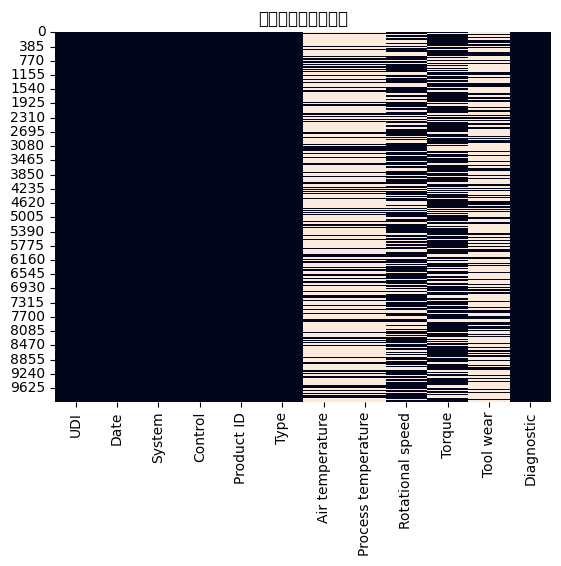

In [26]:
# 可視化缺失值分佈
sns.heatmap(new_data.isnull(), cbar=False)
plt.title("現場數據缺失值分佈")
plt.show()

In [27]:
new_data[['Air temperature', 'Process temperature', 'Rotational speed', 
    'Torque', 'Tool wear']].describe()

Air temperature  Process temperature  Rotational speed       Torque  \
count      3437.000000          3437.000000       6679.000000  6563.000000   
mean        300.064358           310.033081       1541.242402    39.965641   
std           2.016596             1.477490        186.509386    10.164474   
min         295.400000           305.800000       1168.000000     3.800000   
25%         298.400000           308.900000       1423.000000    33.100000   
50%         300.100000           310.100000       1502.000000    39.900000   
75%         301.600000           311.100000       1613.500000    46.700000   
max         304.300000           313.800000       2886.000000    76.600000   

         Tool wear  
count  3321.000000  
mean    110.524240  
std      64.563871  
min       0.000000  
25%      55.000000  
50%     110.000000  
75%     167.000000  
max     253.000000

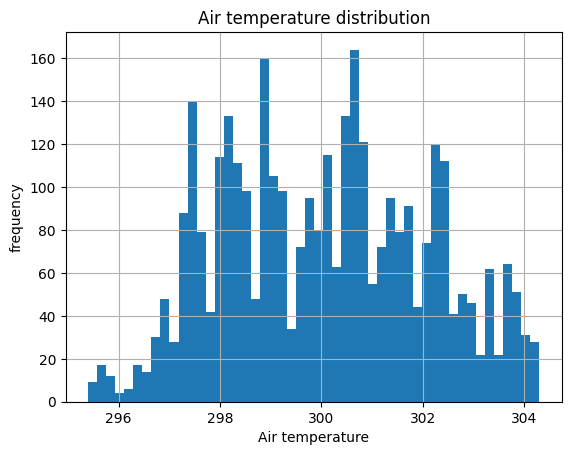

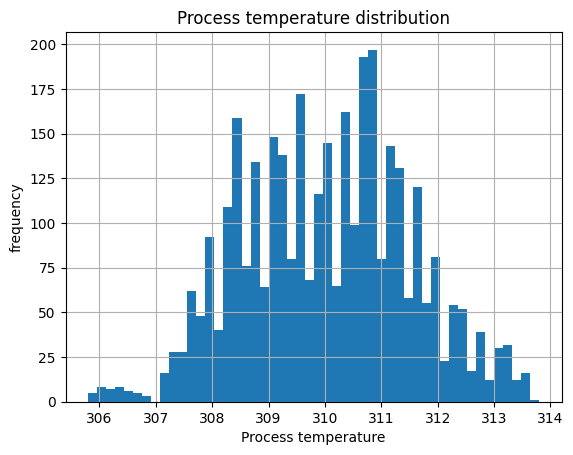

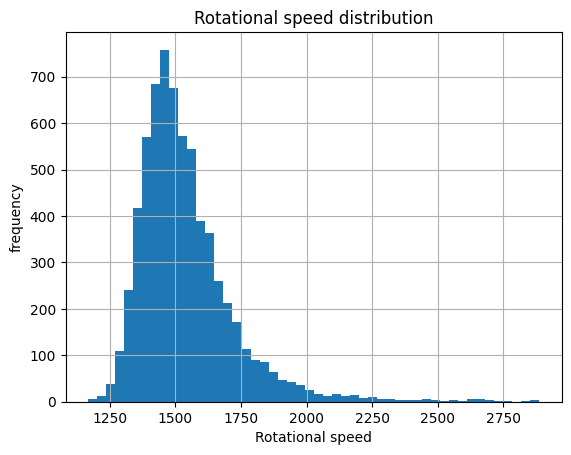

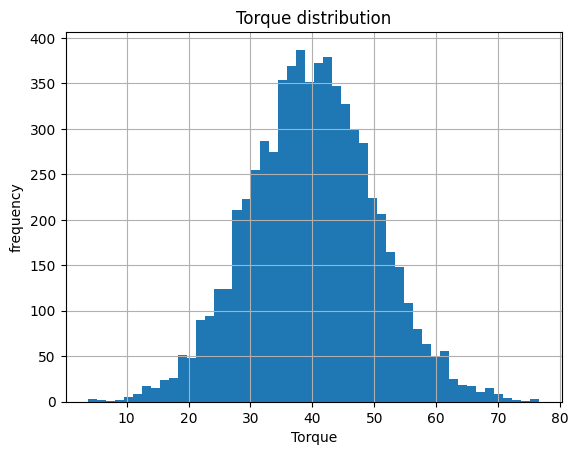

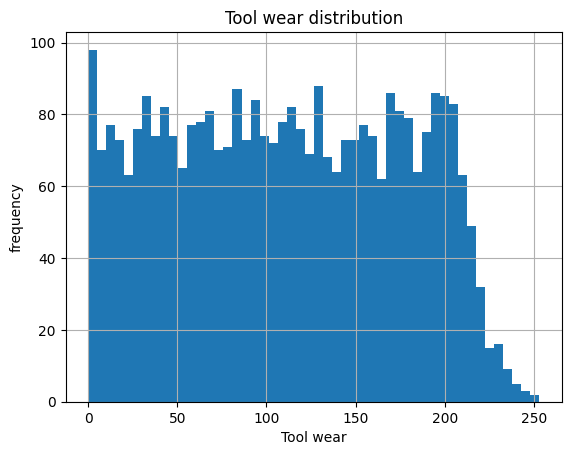

In [28]:
for col in ['Air temperature', 'Process temperature', 'Rotational speed', 
    'Torque', 'Tool wear']:
    plt.figure()
    new_data[col].hist(bins=50)
    plt.title(f"{col} distribution")
    plt.xlabel(col); plt.ylabel("frequency")
    plt.show()


In [29]:
new_data['Diagnostic'].value_counts().plot(kind='bar')
plt.title("各 Diagnostic 類型樣本數分佈")
plt.ylabel("樣本數")
plt.show()


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27171 (\N{CJK UNIFIED IDEOGRAPH-6A23}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170:

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24501 (\N{CJK UNIFIED IDEOGRAPH-5FB5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170:

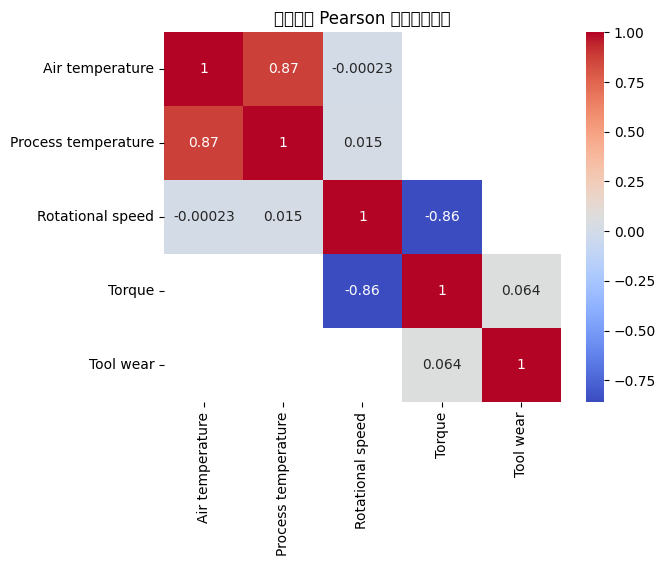

In [30]:
corr = new_data[['Air temperature', 'Process temperature', 'Rotational speed', 
    'Torque', 'Tool wear']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("數值特徵 Pearson 相關係數矩陣")
plt.show()


In [31]:
# 定義數值欄位
numeric_cols = ['Air temperature', 'Process temperature', 'Rotational speed', 
    'Torque', 'Tool wear']

# comparison

In [32]:
def find_all_csv_files(root_dir):
    map_csv_files = {}
    for dirpath, _, filenames in os.walk(root_dir):
        for f in filenames:
            if f.endswith('.csv'):
                map_csv_files[os.path.splitext(f)[0]] = os.path.join(dirpath, f)
    return map_csv_files

auto_encoder_dir = '../../instance/auto-encoder'
auto_encoder_data = find_all_csv_files(auto_encoder_dir)
print(auto_encoder_data)
print(len(auto_encoder_data))

{'PMDI_imputed_ffill_knn_on_system_autoencoder': '../../instance/auto-encoder\\PMDI_imputed_ffill_knn_on_system_autoencoder.csv', 'PMDI_imputed_ffill_mean_on_system_autoencoder': '../../instance/auto-encoder\\PMDI_imputed_ffill_mean_on_system_autoencoder.csv', 'PMDI_imputed_ffill_median_on_system_autoencoder': '../../instance/auto-encoder\\PMDI_imputed_ffill_median_on_system_autoencoder.csv', 'PMDI_imputed_ffill_rolling_on_system_autoencoder': '../../instance/auto-encoder\\PMDI_imputed_ffill_rolling_on_system_autoencoder.csv', 'PMDI_imputed_linear_knn_on_system_autoencoder': '../../instance/auto-encoder\\PMDI_imputed_linear_knn_on_system_autoencoder.csv', 'PMDI_imputed_linear_mean_on_system_autoencoder': '../../instance/auto-encoder\\PMDI_imputed_linear_mean_on_system_autoencoder.csv', 'PMDI_imputed_linear_median_on_system_autoencoder': '../../instance/auto-encoder\\PMDI_imputed_linear_median_on_system_autoencoder.csv', 'PMDI_imputed_linear_rolling_on_system_autoencoder': '../../instan

現在在處理：PMDI_imputed_ffill_knn_on_system_autoencoder (../../instance/auto-encoder\PMDI_imputed_ffill_knn_on_system_autoencoder.csv)


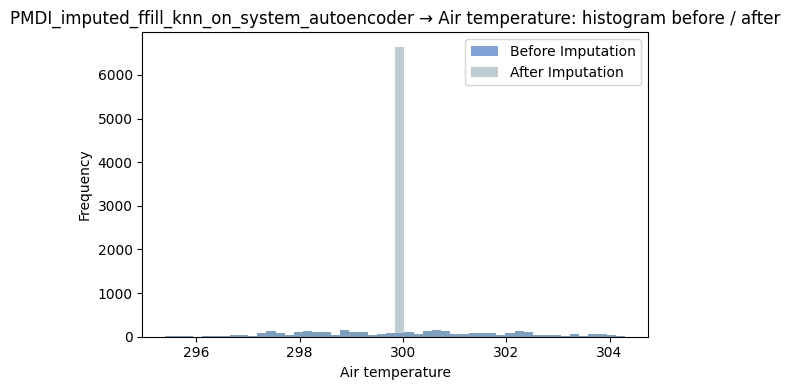

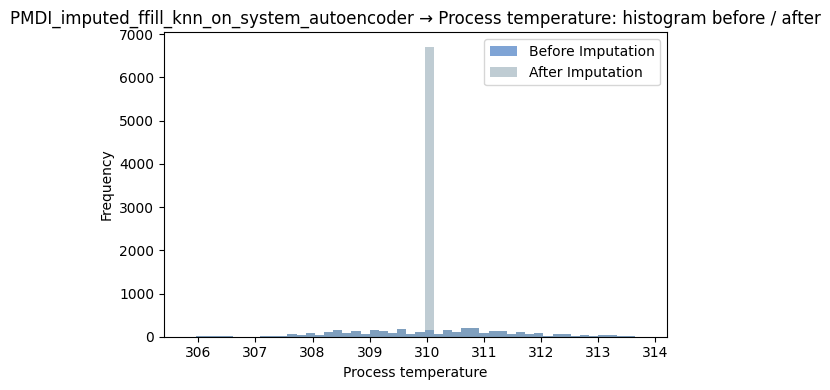

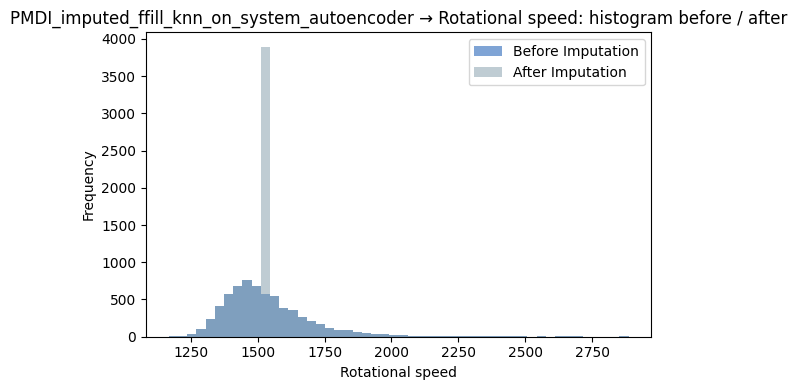

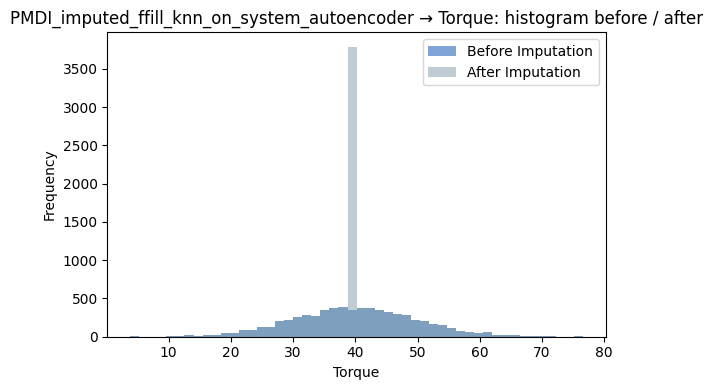

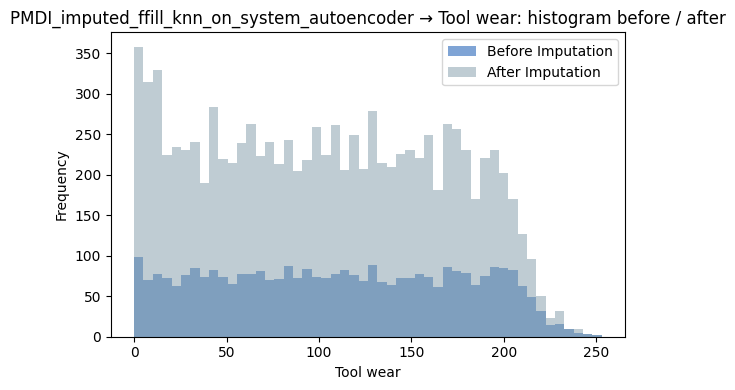

現在在處理：PMDI_imputed_ffill_mean_on_system_autoencoder (../../instance/auto-encoder\PMDI_imputed_ffill_mean_on_system_autoencoder.csv)


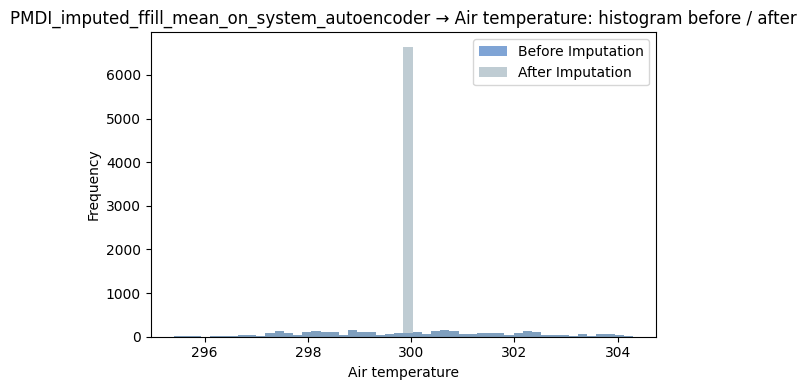

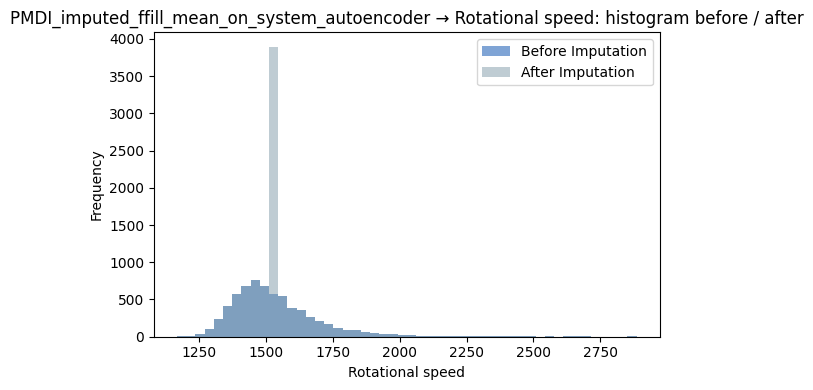

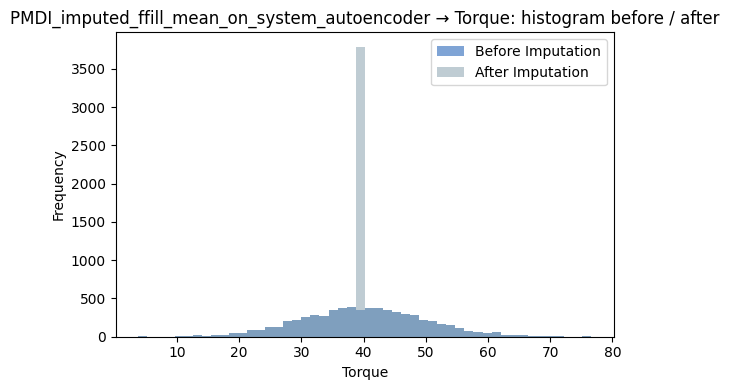

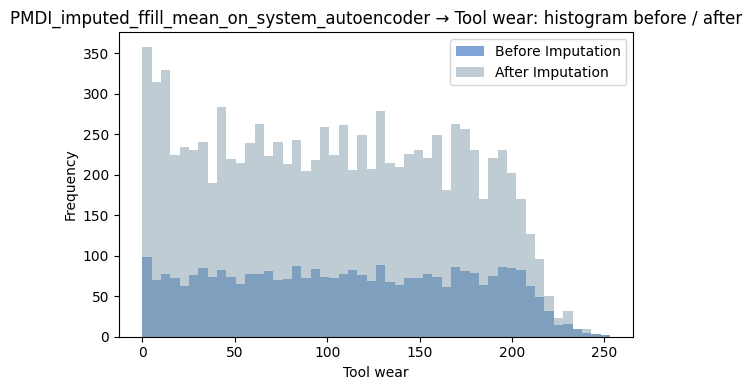

現在在處理：PMDI_imputed_ffill_median_on_system_autoencoder (../../instance/auto-encoder\PMDI_imputed_ffill_median_on_system_autoencoder.csv)


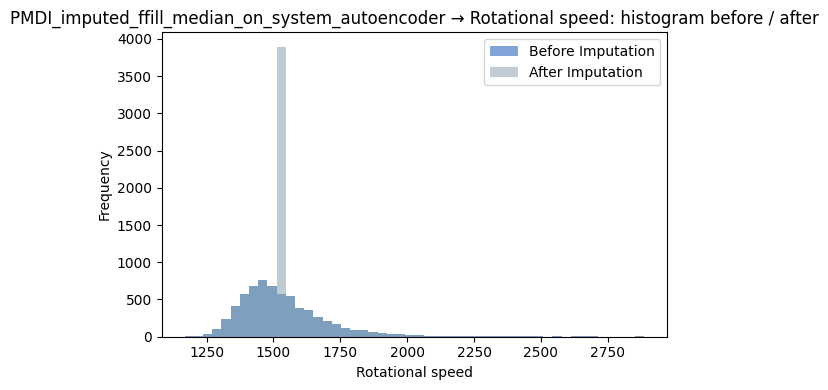

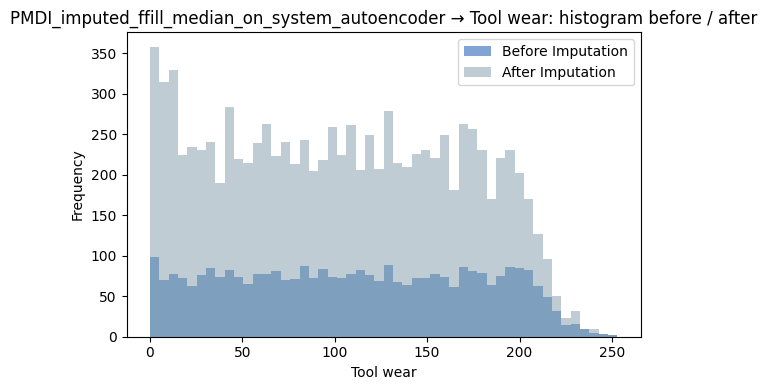

現在在處理：PMDI_imputed_ffill_rolling_on_system_autoencoder (../../instance/auto-encoder\PMDI_imputed_ffill_rolling_on_system_autoencoder.csv)


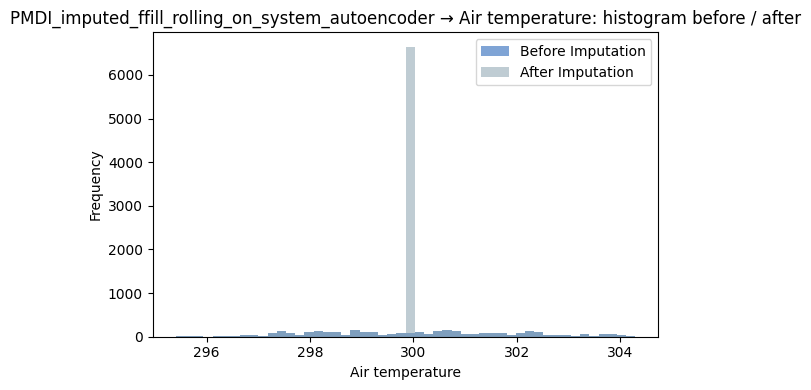

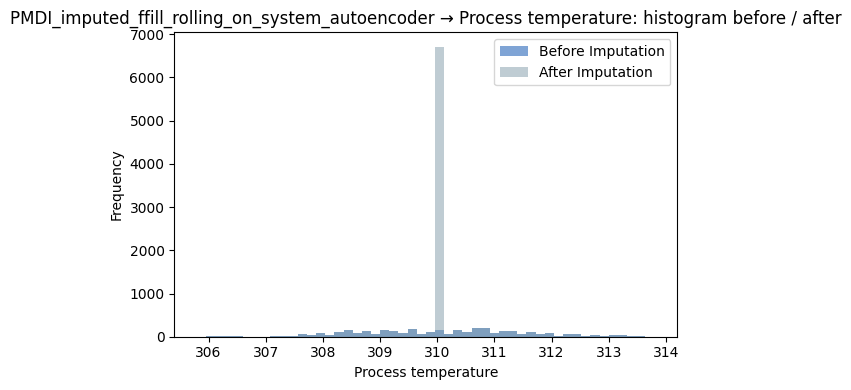

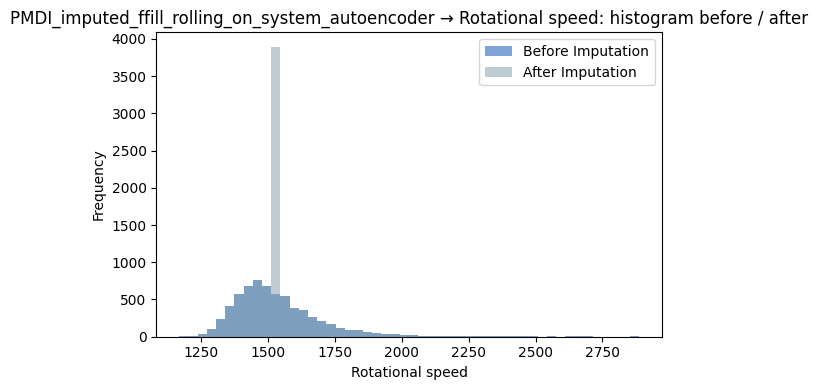

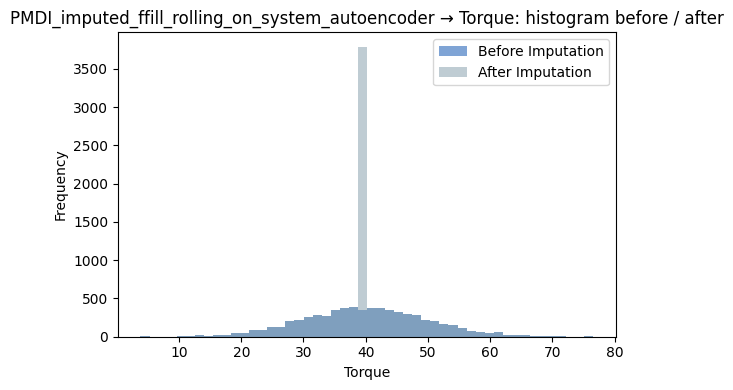

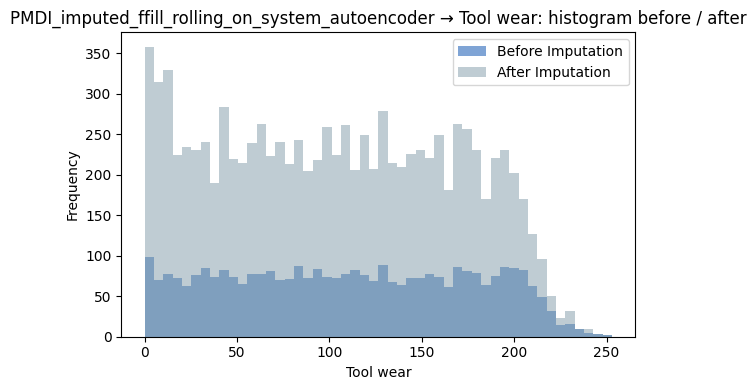

現在在處理：PMDI_imputed_linear_knn_on_system_autoencoder (../../instance/auto-encoder\PMDI_imputed_linear_knn_on_system_autoencoder.csv)


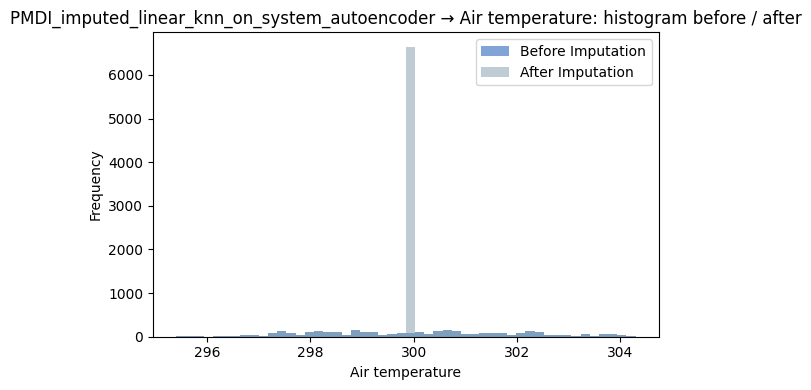

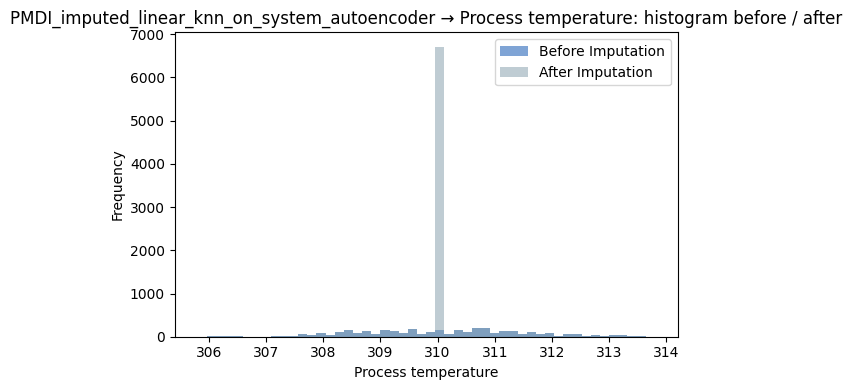

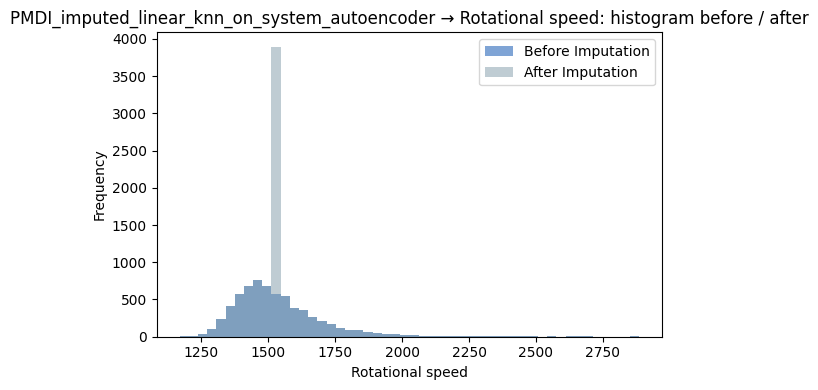

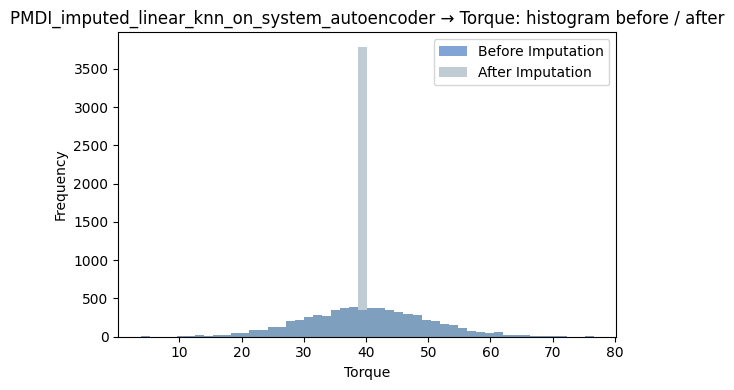

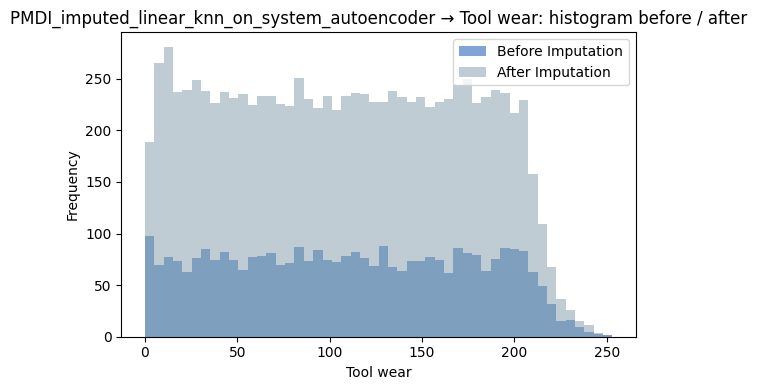

現在在處理：PMDI_imputed_linear_mean_on_system_autoencoder (../../instance/auto-encoder\PMDI_imputed_linear_mean_on_system_autoencoder.csv)


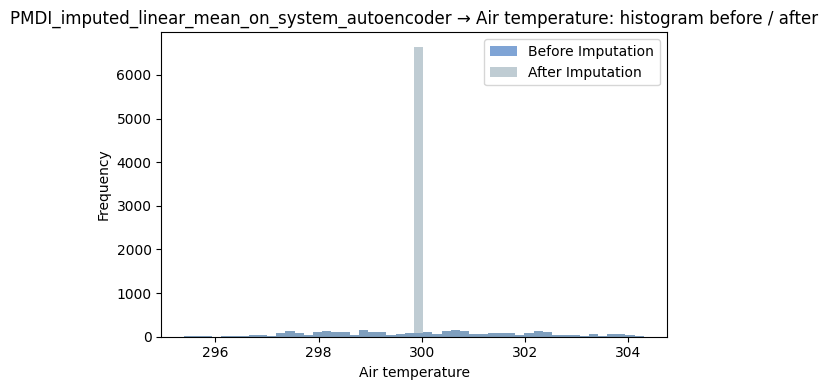

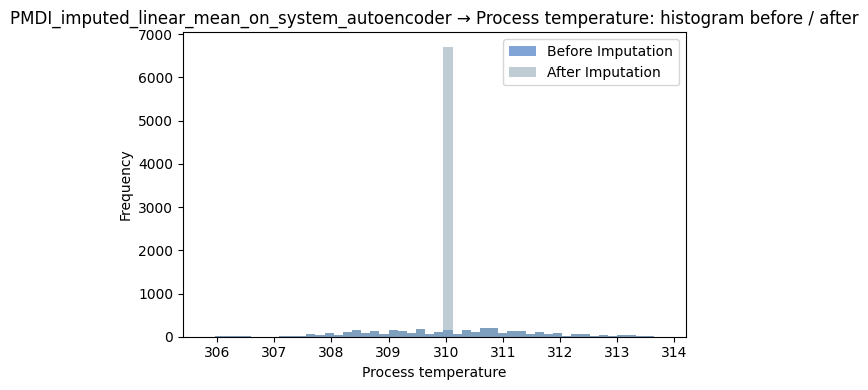

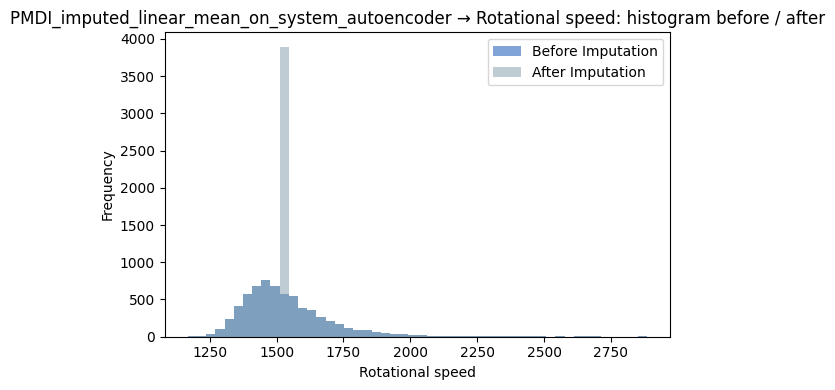

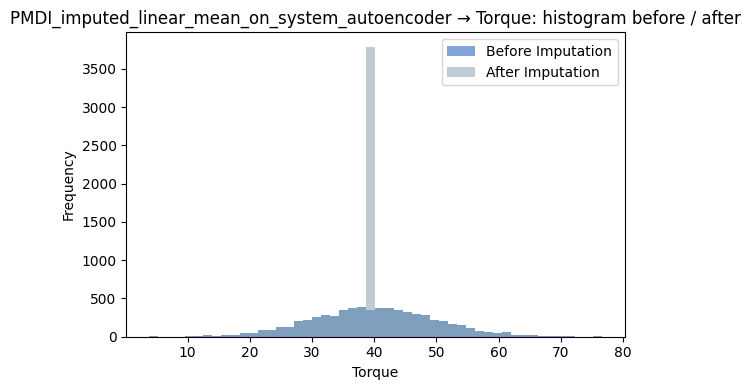

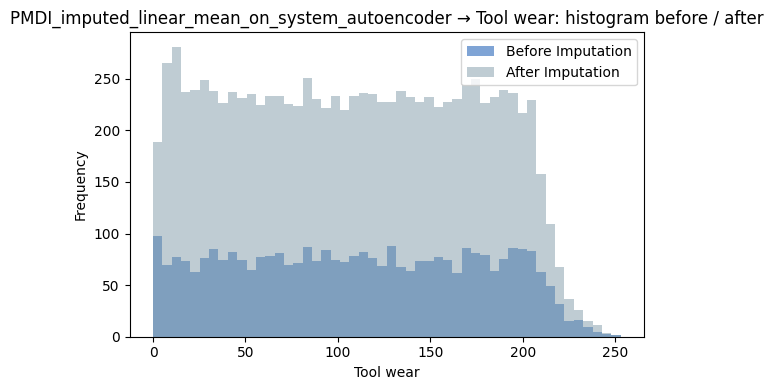

現在在處理：PMDI_imputed_linear_median_on_system_autoencoder (../../instance/auto-encoder\PMDI_imputed_linear_median_on_system_autoencoder.csv)


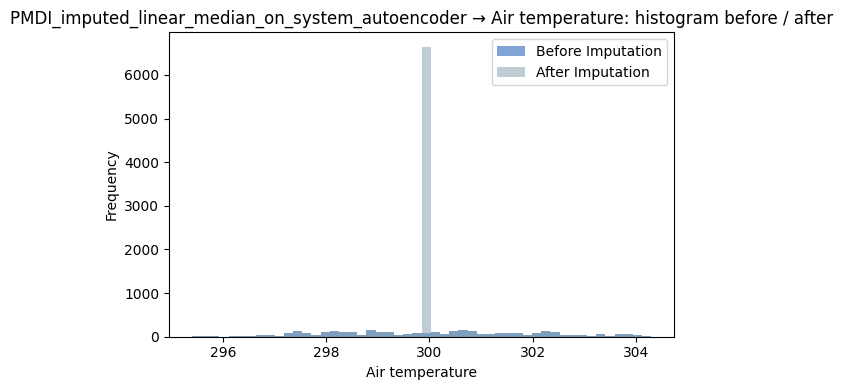

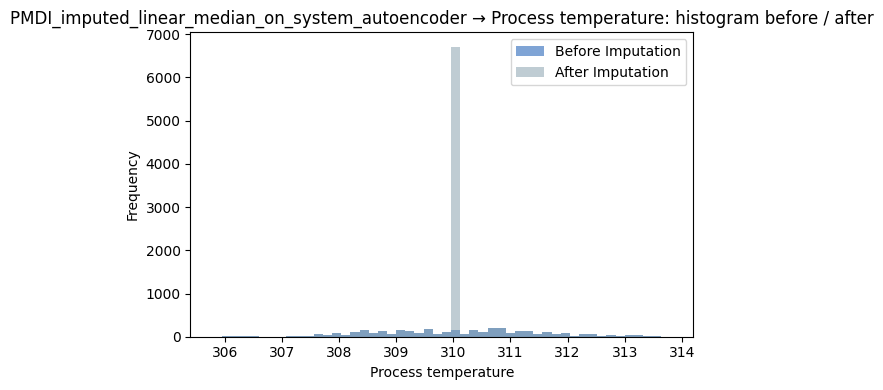

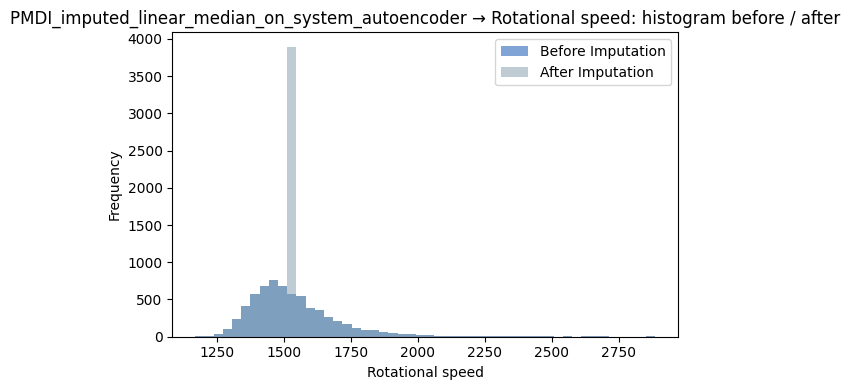

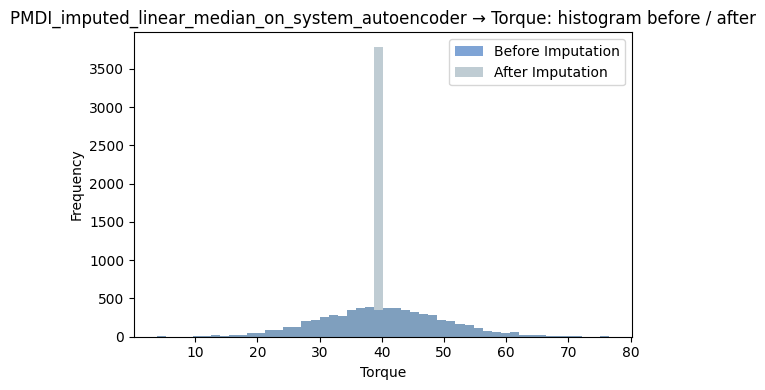

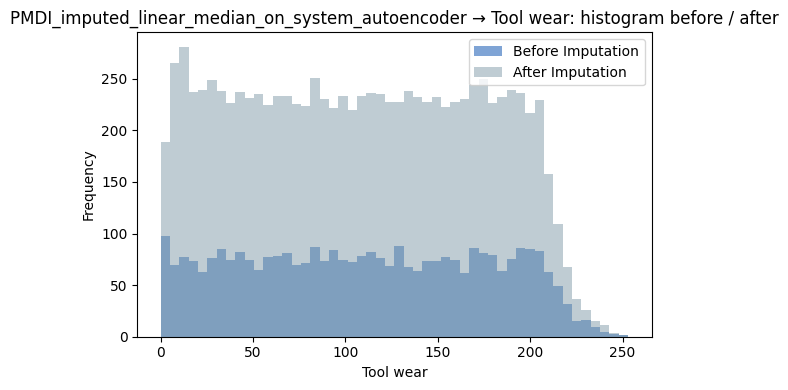

現在在處理：PMDI_imputed_linear_rolling_on_system_autoencoder (../../instance/auto-encoder\PMDI_imputed_linear_rolling_on_system_autoencoder.csv)


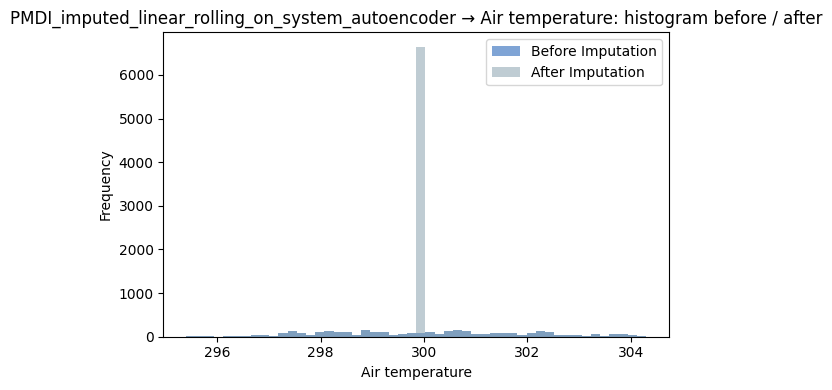

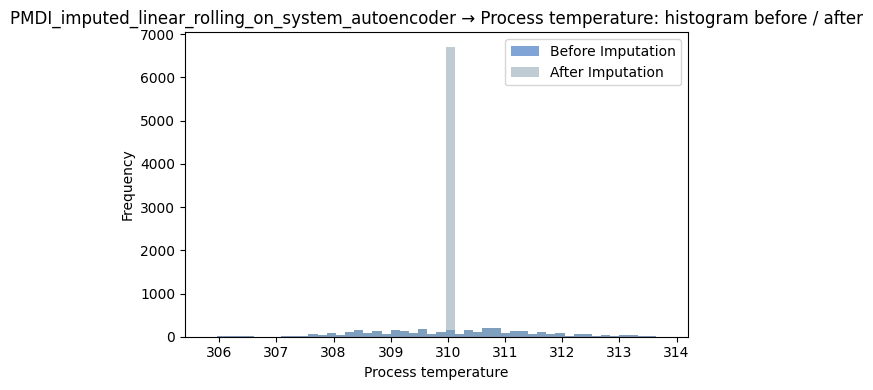

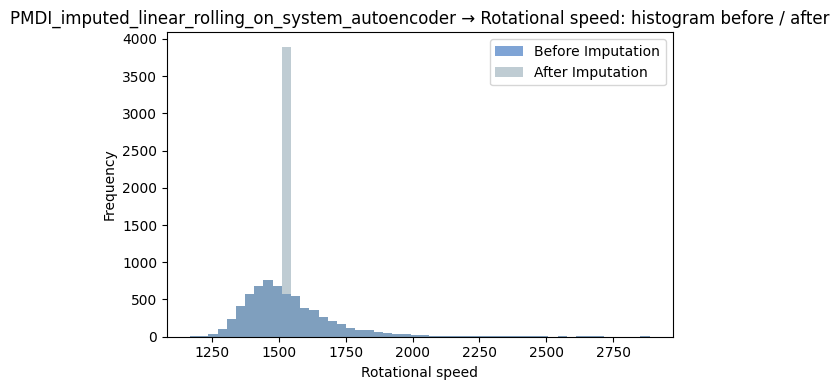

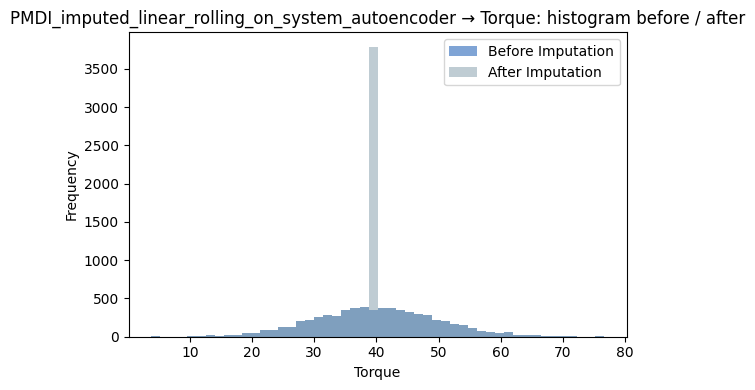

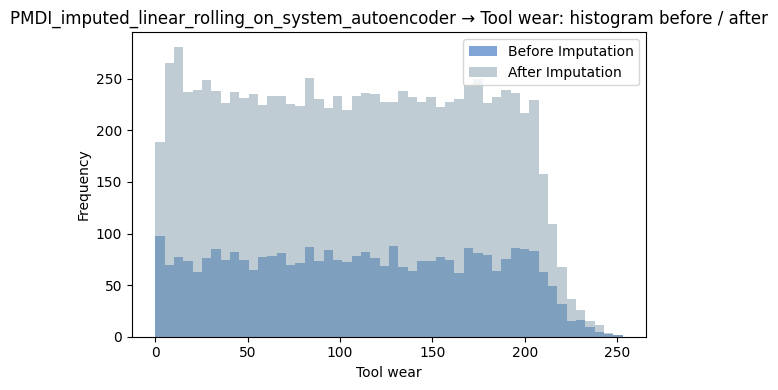

現在在處理：PMDI_imputed_rolling_knn_on_system_autoencoder (../../instance/auto-encoder\PMDI_imputed_rolling_knn_on_system_autoencoder.csv)


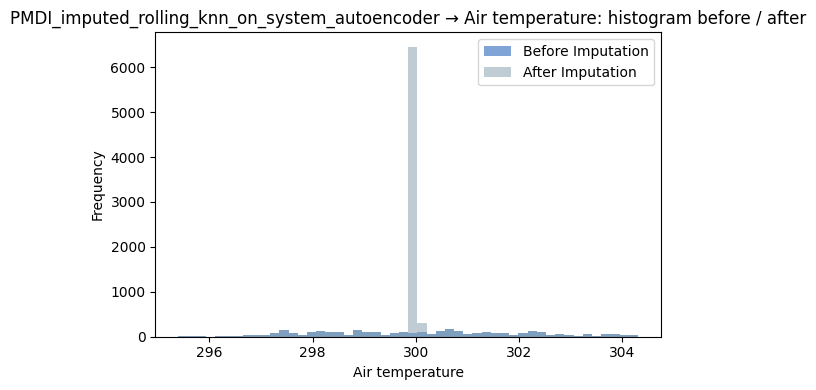

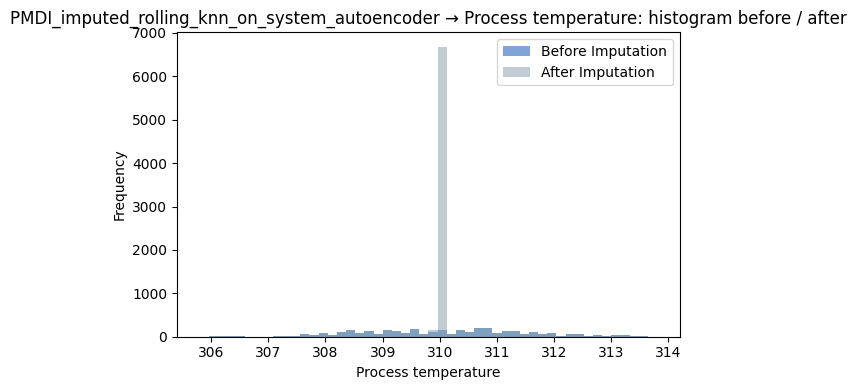

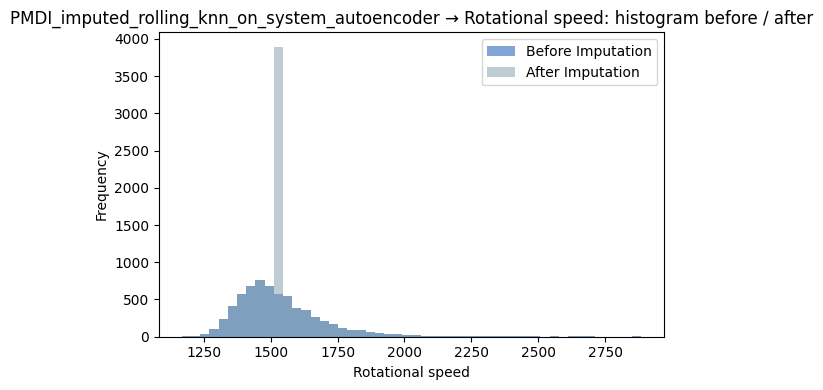

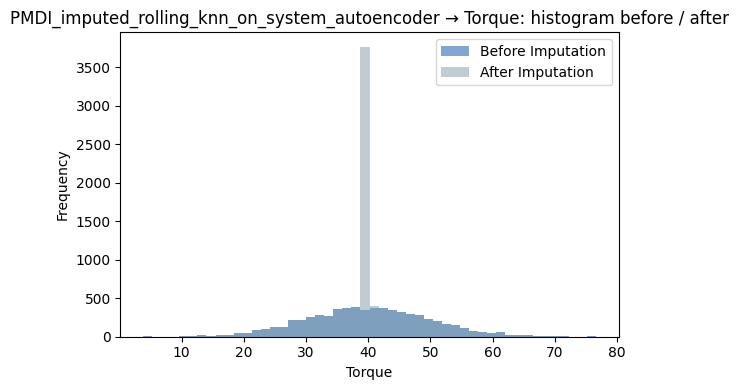

現在在處理：PMDI_imputed_rolling_mean_on_system_autoencoder (../../instance/auto-encoder\PMDI_imputed_rolling_mean_on_system_autoencoder.csv)


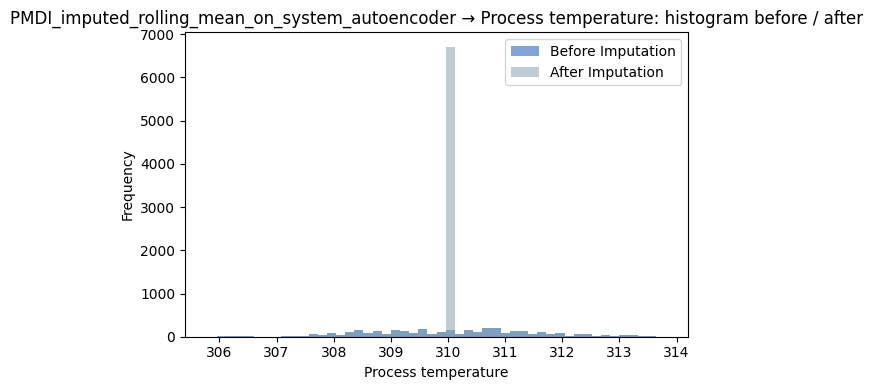

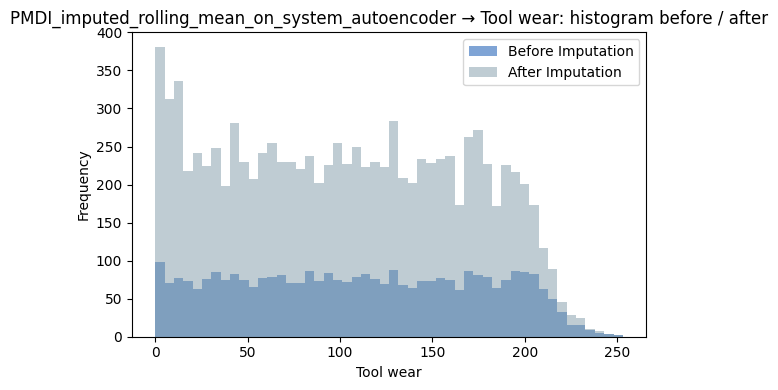

現在在處理：PMDI_imputed_rolling_median_on_system_autoencoder (../../instance/auto-encoder\PMDI_imputed_rolling_median_on_system_autoencoder.csv)


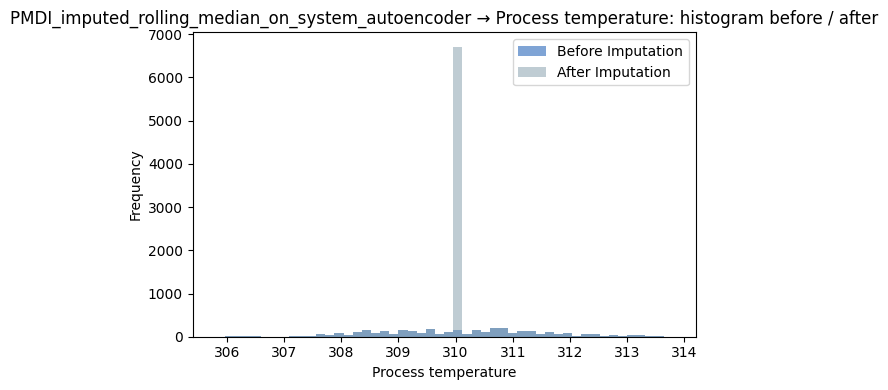

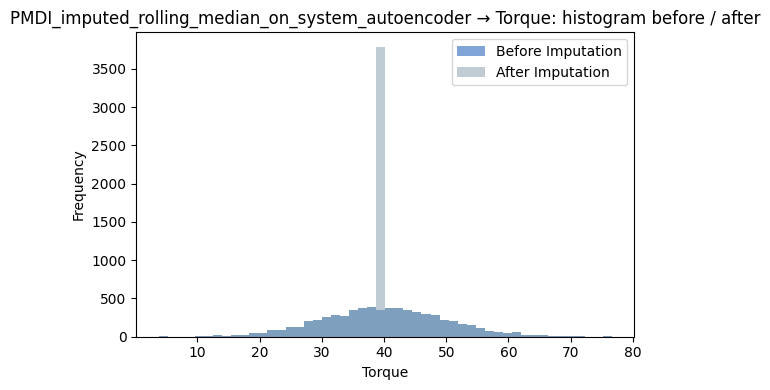

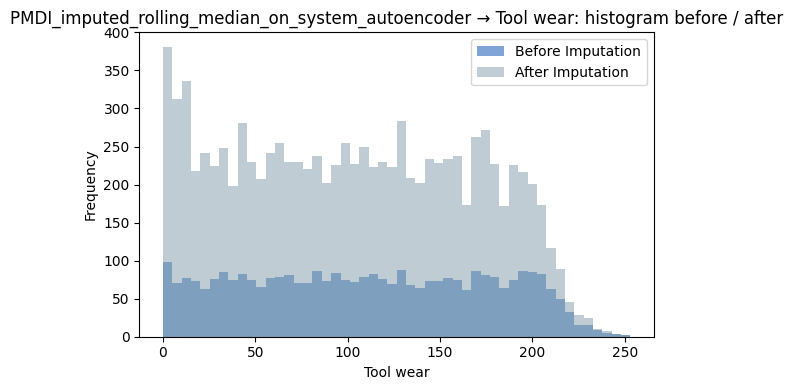

現在在處理：PMDI_imputed_rolling_rolling_on_system_autoencoder (../../instance/auto-encoder\PMDI_imputed_rolling_rolling_on_system_autoencoder.csv)


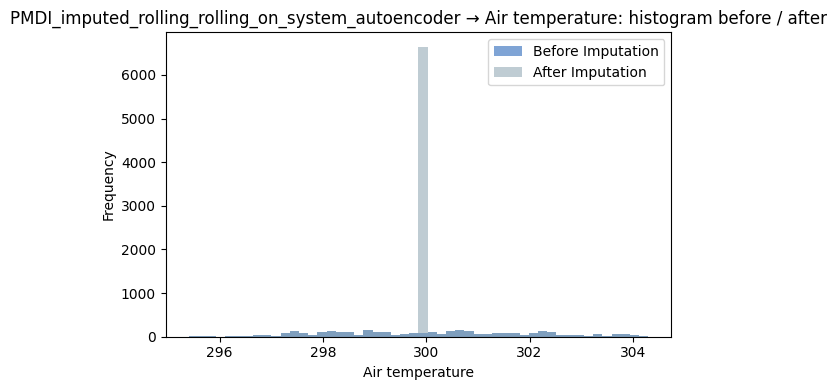

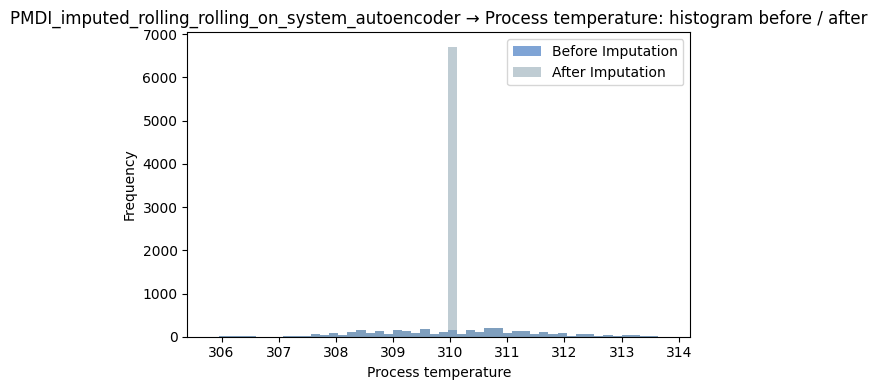

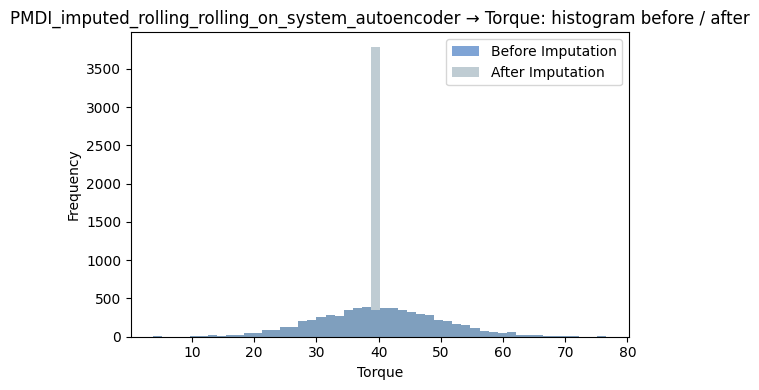

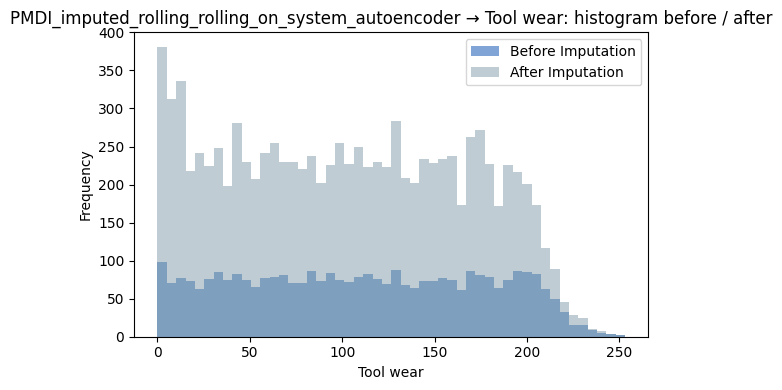

總共產生了 60 張比較圖


In [33]:
plot_count = 0
for name, path in auto_encoder_data.items():
    print(f"現在在處理：{name} ({path})")   
    # 讀取「補值後」的 CSV
    df_after = pd.read_csv(path)
    
    # 確認所有 numeric_cols 都存在於 df_after 中
    missing_cols = [c for c in numeric_cols if c not in df_after.columns]
    if missing_cols:
        print(f"警告：{name} 缺少欄位 {missing_cols}，跳過這個檔案。")
        continue
    
    # 針對每一個數值欄位畫出「補值前 vs 補值後」的直方圖
    for col in numeric_cols:
        # 原始有值的資料（去掉 NaN）
        series_before = new_data[col].dropna()
        # 補值後（CSV 讀進來會有完整值）
        series_after = df_after[col]
        
        plt.figure(figsize=(6, 4))
        plt.hist(series_before, bins=50, alpha=0.5, label='Before Imputation', color='#004aad')
        plt.hist(series_after, bins=50, alpha=0.5, label='After Imputation', color='#809ba8')
        plt.title(f'{name} → {col}: histogram before / after')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.tight_layout()
        plt.show()
        # 如果想要將圖片存檔，取消下一行的註解並指定路徑：
        # plt.savefig(f"plots/{name}_{col}_hist.png", dpi=200)
        plt.close()
        plot_count += 1

print(f"總共產生了 {plot_count} 張比較圖")

In [34]:
# 1. 把三種補值方法對應的資料夾放到一個列表裡
methods = ['ffill', 'linear', 'rolling']
base_path = '../../instance/on_system'

# 2. 用一個字典把每種方法底下的 CSV 檔路徑都蒐集起來
all_instance_files = {}

for method in methods:
    root_dir = os.path.join(base_path, method)
    instance_files = find_all_csv_files(root_dir)
    all_instance_files[method] = instance_files

    # 印出該方法底下找到的檔案與數量
    print(f"=== 方法：{method} ===")
    print(instance_files)
    print(f"共找到 {len(instance_files)} 個 CSV\n")

# 如果你只想要把所有檔案合併到同一個字典，也可以這樣：
merged_files = {}
for method, files in all_instance_files.items():
    for name, path in files.items():
        # key 可以加上 method 前綴，避免同名衝突
        merged_files[f"{method}_{name}"] = path

print("=== 合併後的所有檔案 ===")
print(merged_files)
print(f"總共 {len(merged_files)} 個 CSV")


=== 方法：ffill ===
{'PMDI_imputed_ffill_knn_on_system': '../../instance/on_system\\ffill\\PMDI_imputed_ffill_knn_on_system.csv', 'PMDI_imputed_ffill_mean_on_system': '../../instance/on_system\\ffill\\PMDI_imputed_ffill_mean_on_system.csv', 'PMDI_imputed_ffill_median_on_system': '../../instance/on_system\\ffill\\PMDI_imputed_ffill_median_on_system.csv', 'PMDI_imputed_ffill_rolling_on_system': '../../instance/on_system\\ffill\\PMDI_imputed_ffill_rolling_on_system.csv'}
共找到 4 個 CSV

=== 方法：linear ===
{'PMDI_imputed_linear_knn_on_system': '../../instance/on_system\\linear\\PMDI_imputed_linear_knn_on_system.csv', 'PMDI_imputed_linear_mean_on_system': '../../instance/on_system\\linear\\PMDI_imputed_linear_mean_on_system.csv', 'PMDI_imputed_linear_median_on_system': '../../instance/on_system\\linear\\PMDI_imputed_linear_median_on_system.csv', 'PMDI_imputed_linear_rolling_on_system': '../../instance/on_system\\linear\\PMDI_imputed_linear_rolling_on_system.csv'}
共找到 4 個 CSV

=== 方法：rolling ===
{'

現在在處理：ffill_PMDI_imputed_ffill_knn_on_system (../../instance/on_system\ffill\PMDI_imputed_ffill_knn_on_system.csv)


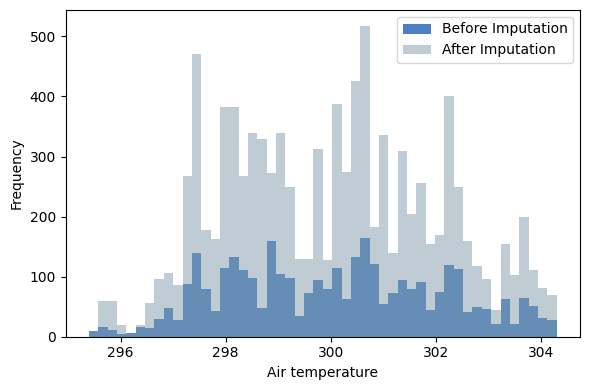

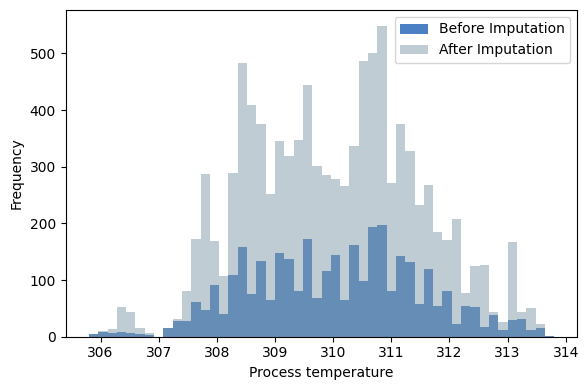

現在在處理：ffill_PMDI_imputed_ffill_mean_on_system (../../instance/on_system\ffill\PMDI_imputed_ffill_mean_on_system.csv)


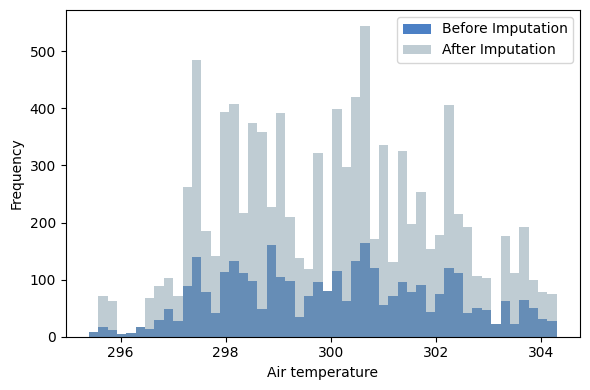

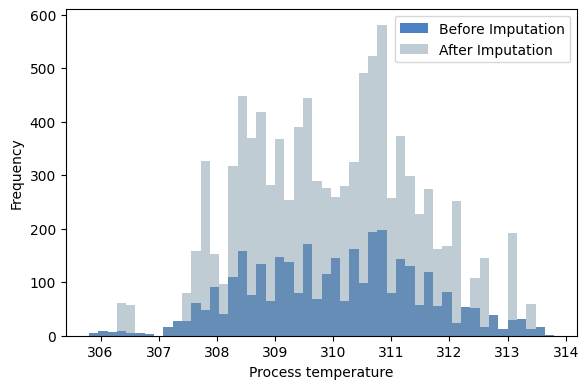

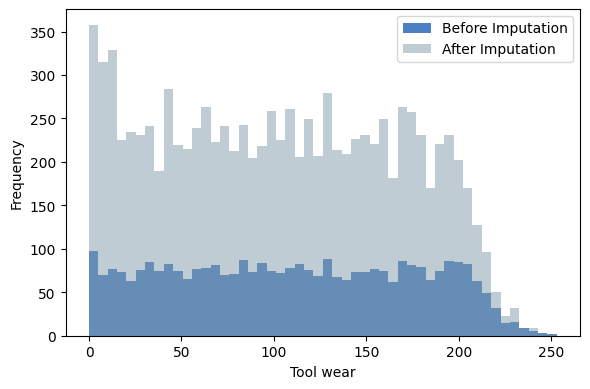

現在在處理：ffill_PMDI_imputed_ffill_median_on_system (../../instance/on_system\ffill\PMDI_imputed_ffill_median_on_system.csv)


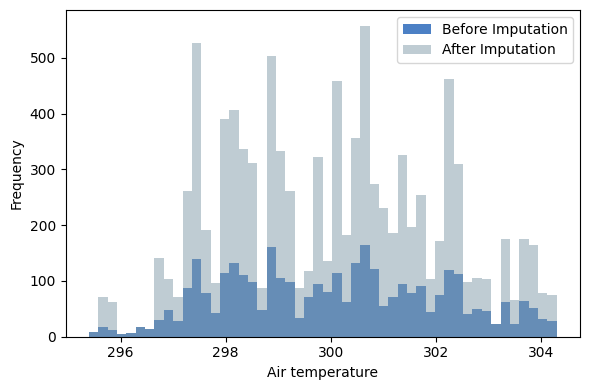

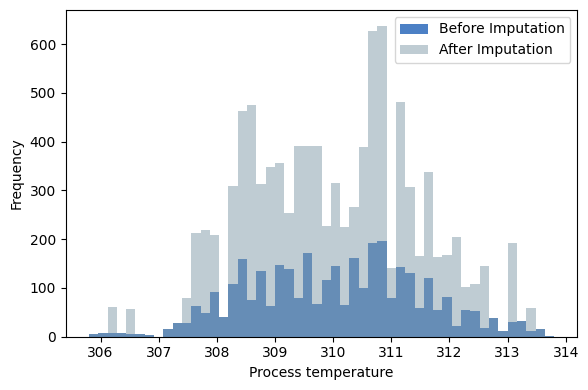

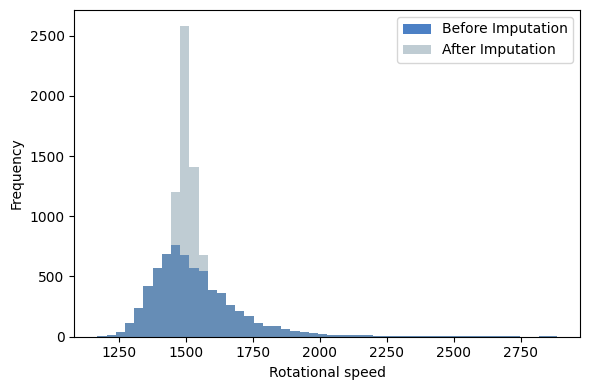

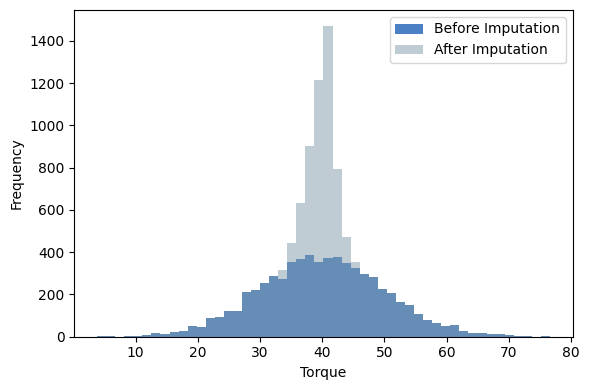

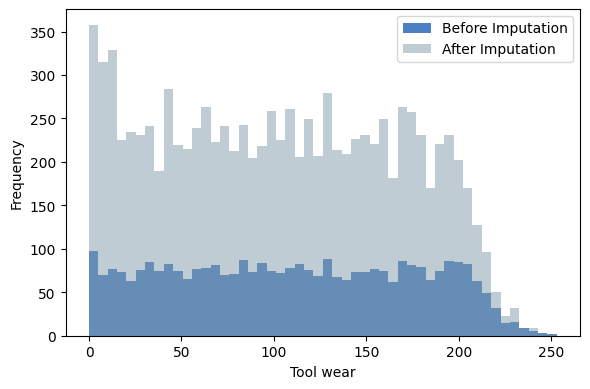

現在在處理：ffill_PMDI_imputed_ffill_rolling_on_system (../../instance/on_system\ffill\PMDI_imputed_ffill_rolling_on_system.csv)


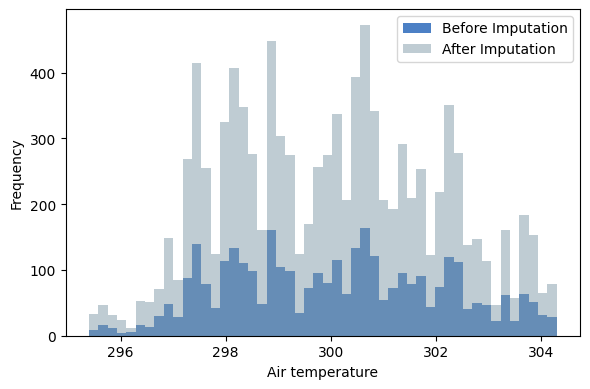

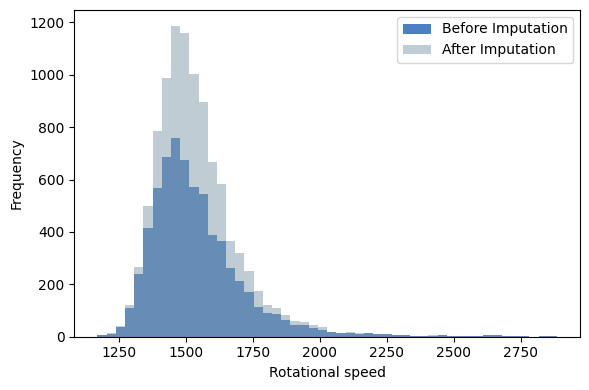

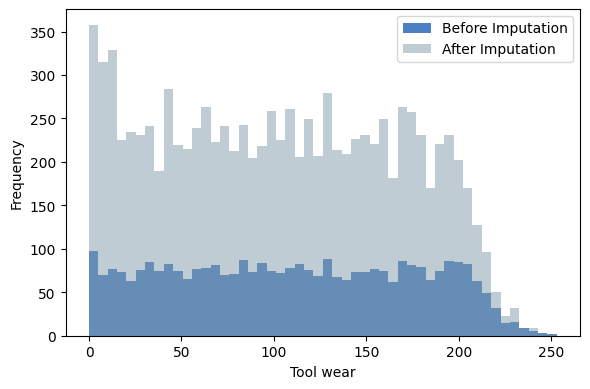

現在在處理：linear_PMDI_imputed_linear_knn_on_system (../../instance/on_system\linear\PMDI_imputed_linear_knn_on_system.csv)


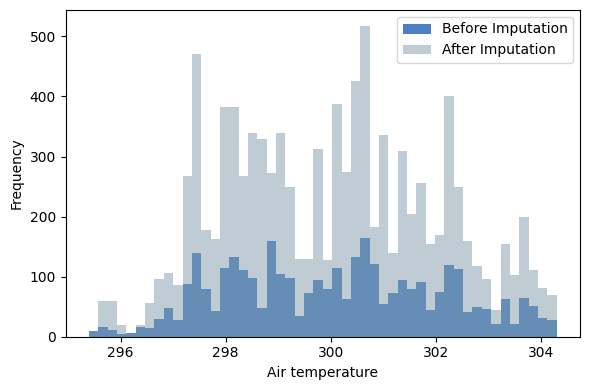

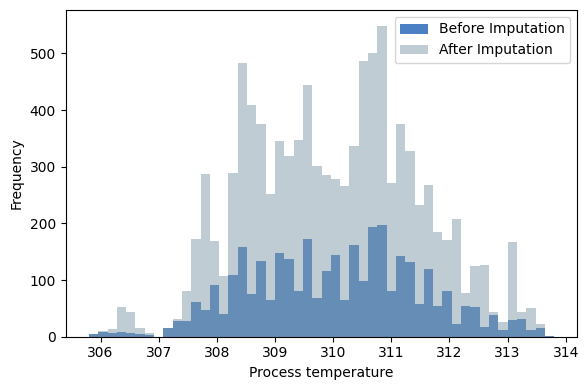

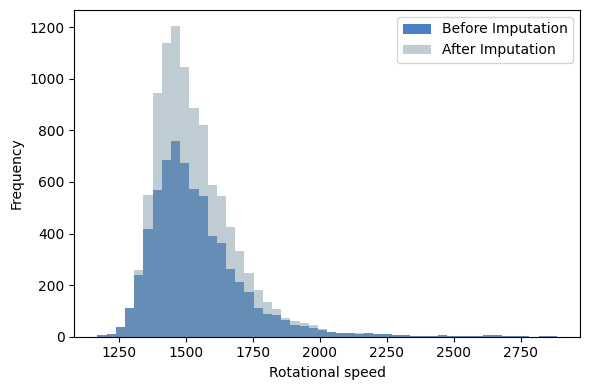

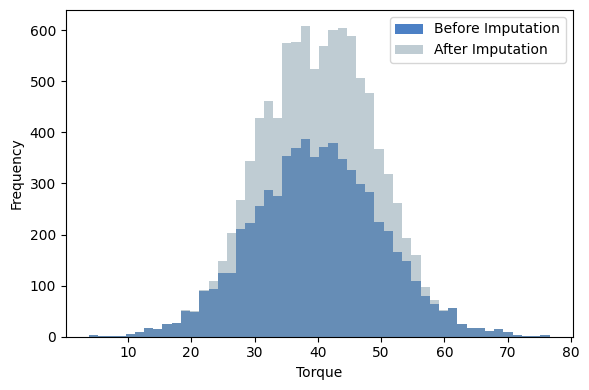

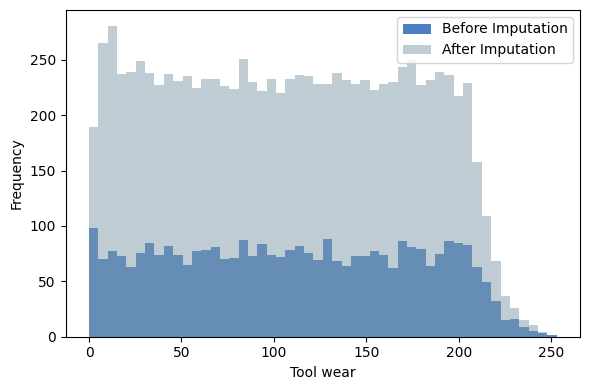

現在在處理：linear_PMDI_imputed_linear_mean_on_system (../../instance/on_system\linear\PMDI_imputed_linear_mean_on_system.csv)


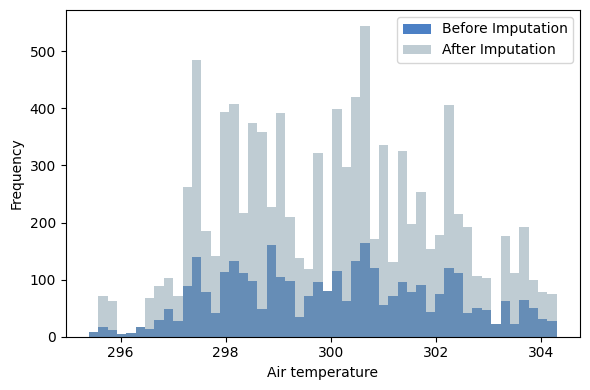

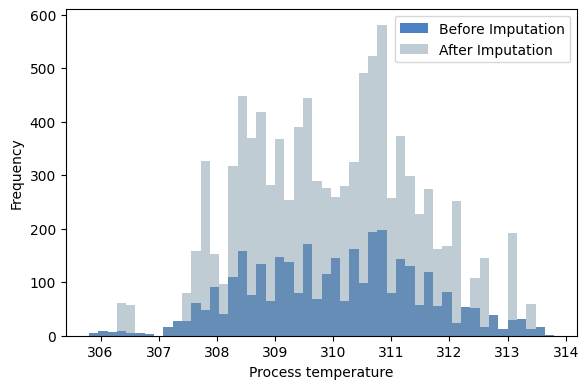

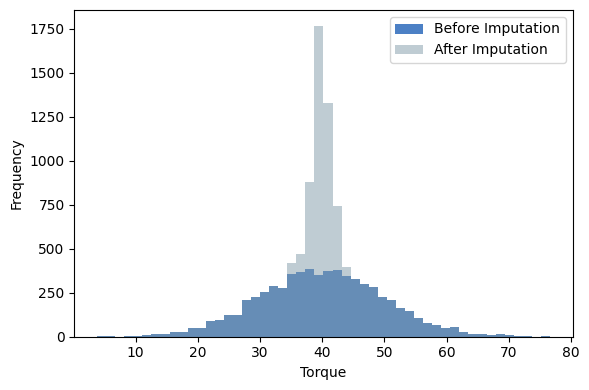

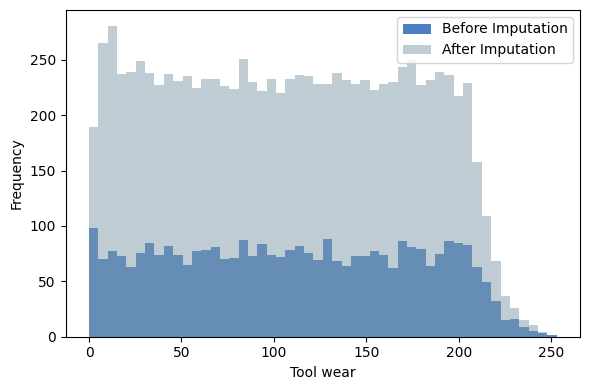

現在在處理：linear_PMDI_imputed_linear_median_on_system (../../instance/on_system\linear\PMDI_imputed_linear_median_on_system.csv)


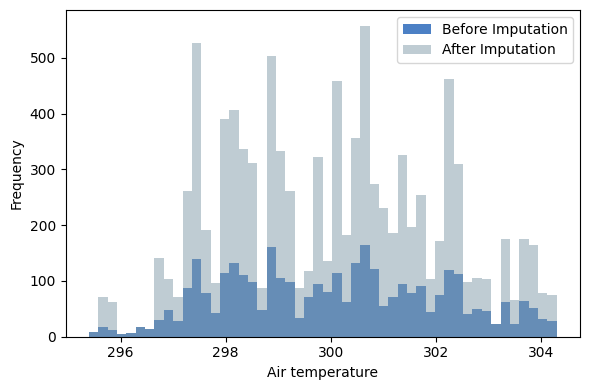

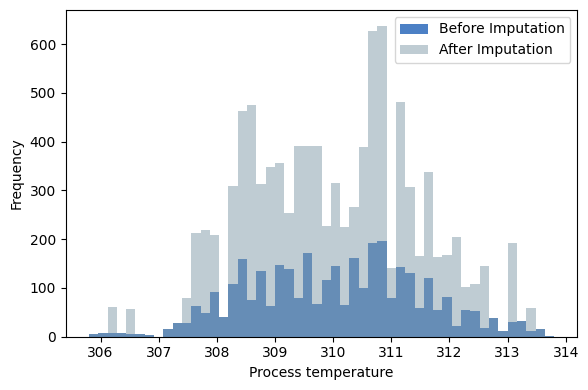

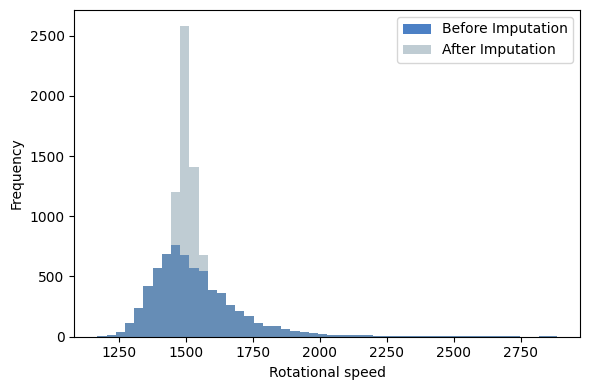

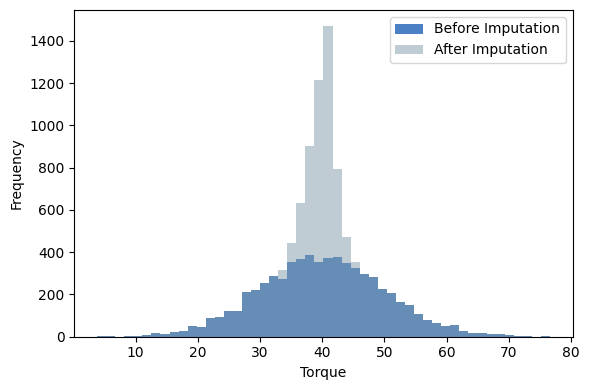

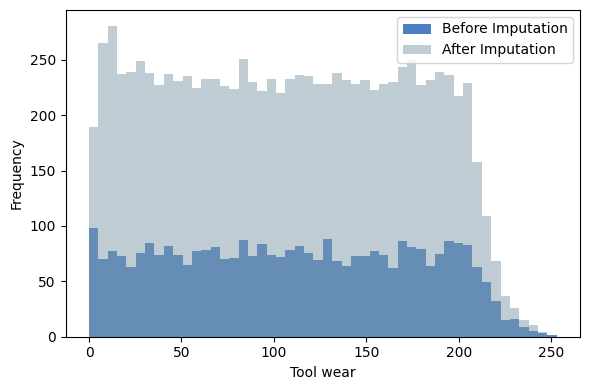

現在在處理：linear_PMDI_imputed_linear_rolling_on_system (../../instance/on_system\linear\PMDI_imputed_linear_rolling_on_system.csv)


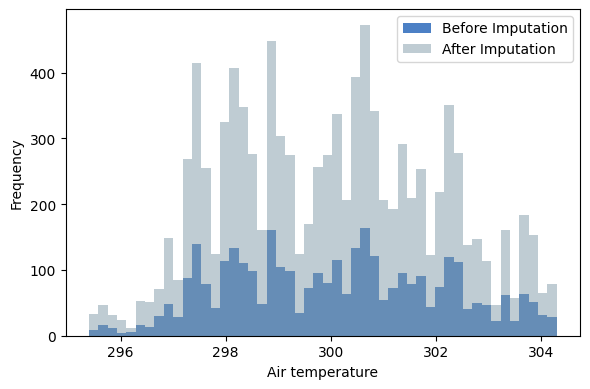

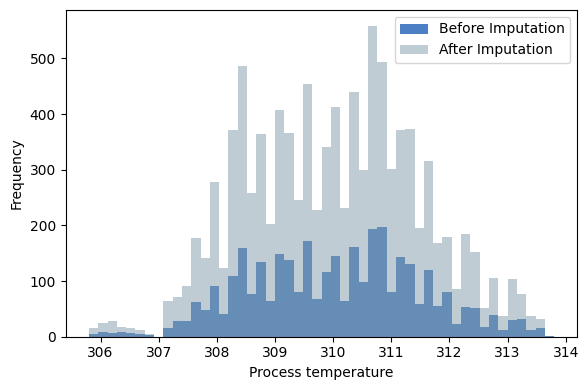

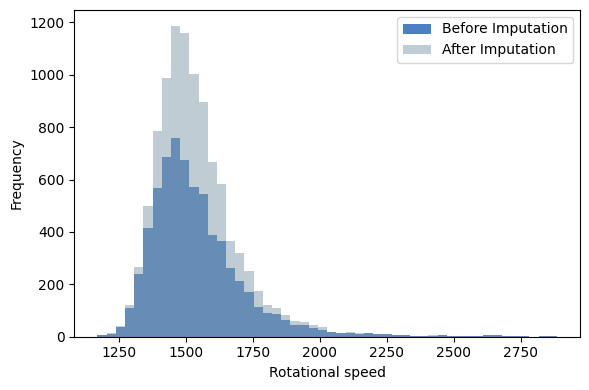

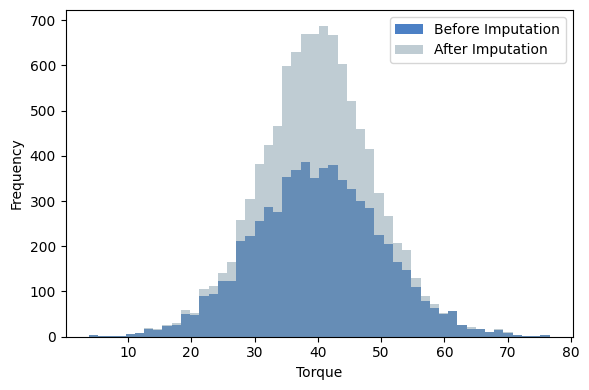

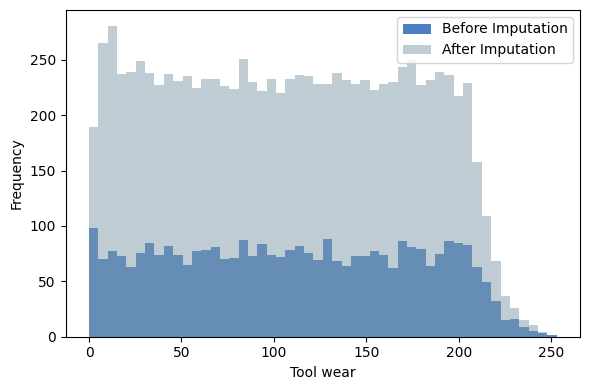

現在在處理：rolling_PMDI_imputed_rolling_knn_on_system (../../instance/on_system\rolling\PMDI_imputed_rolling_knn_on_system.csv)


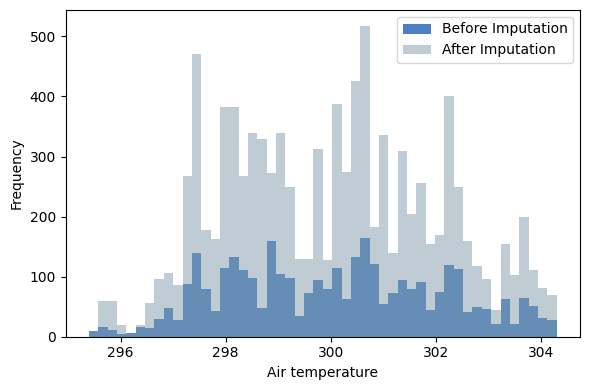

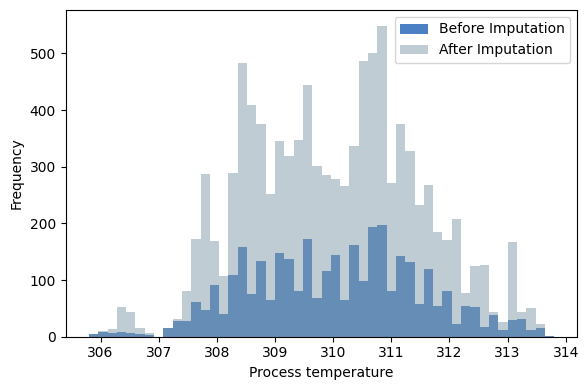

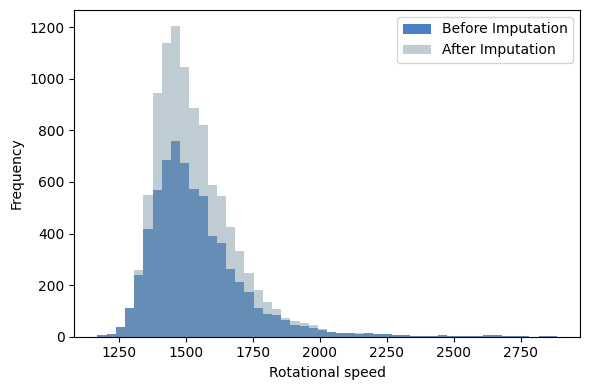

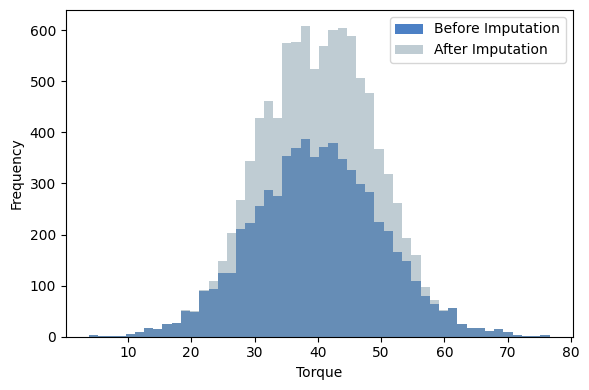

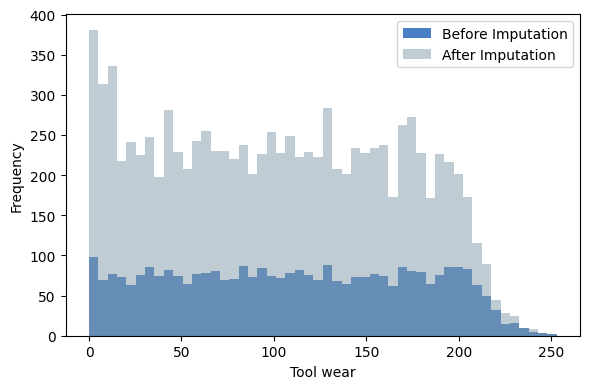

現在在處理：rolling_PMDI_imputed_rolling_mean_on_system (../../instance/on_system\rolling\PMDI_imputed_rolling_mean_on_system.csv)


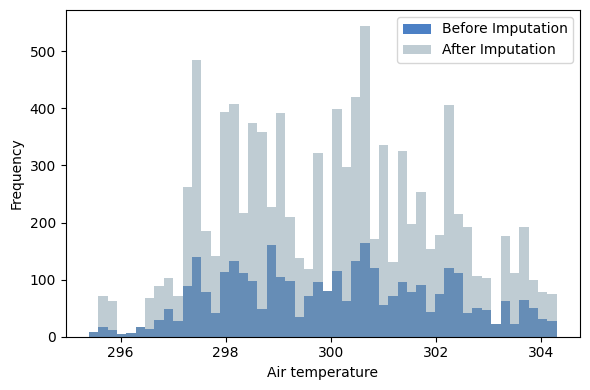

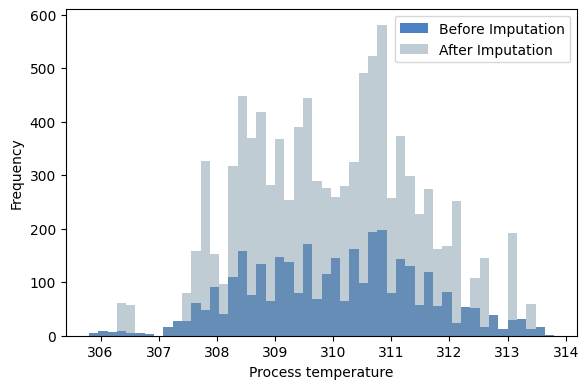

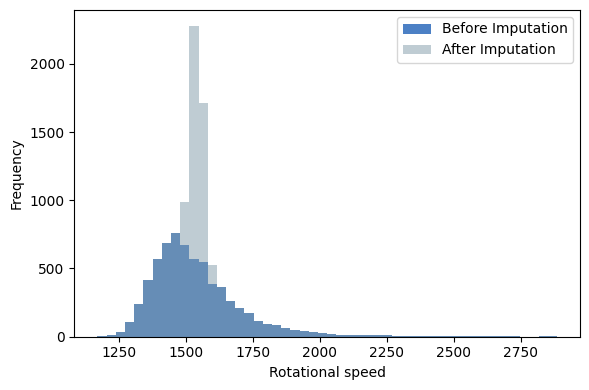

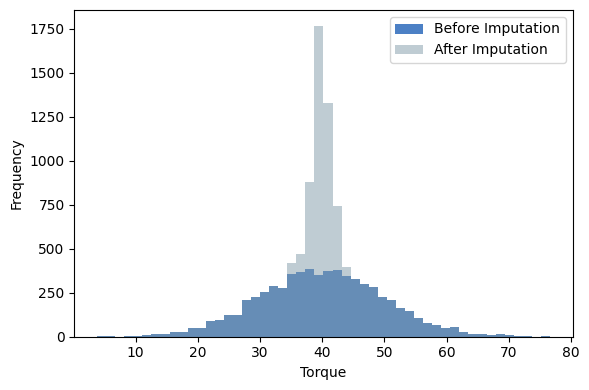

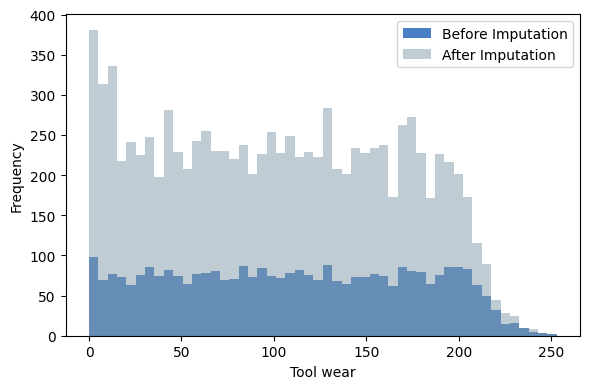

現在在處理：rolling_PMDI_imputed_rolling_median_on_system (../../instance/on_system\rolling\PMDI_imputed_rolling_median_on_system.csv)


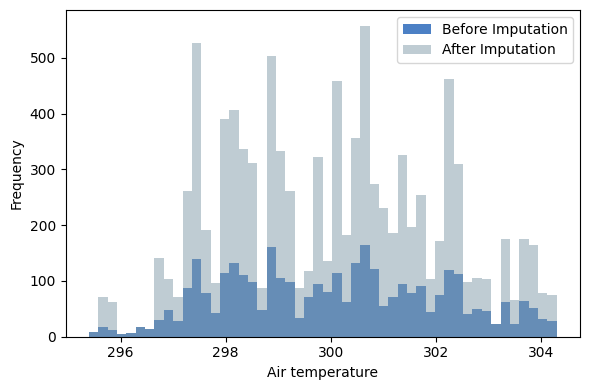

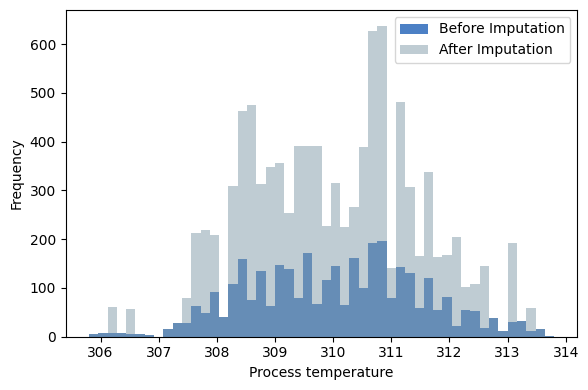

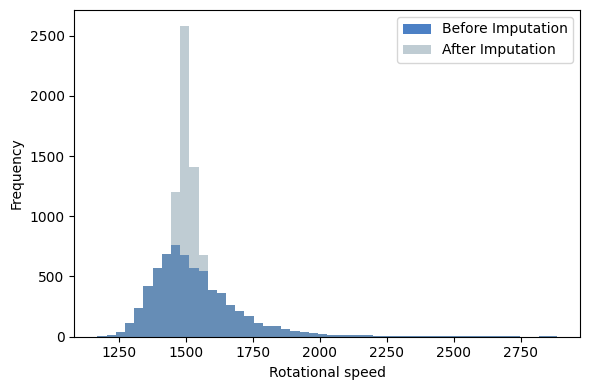

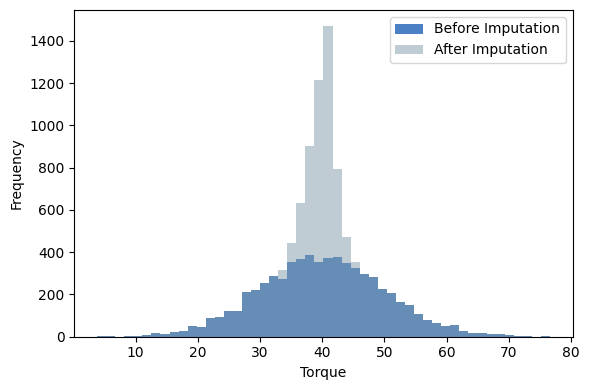

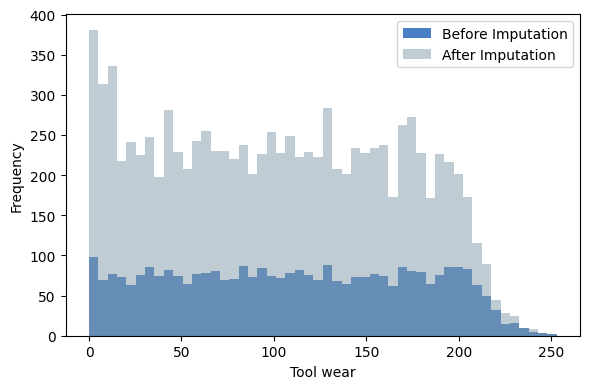

現在在處理：rolling_PMDI_imputed_rolling_rolling_on_system (../../instance/on_system\rolling\PMDI_imputed_rolling_rolling_on_system.csv)


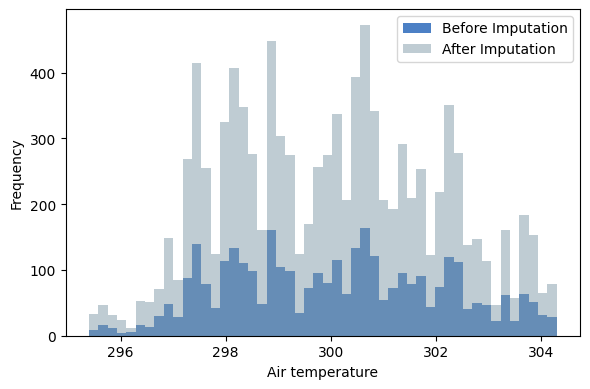

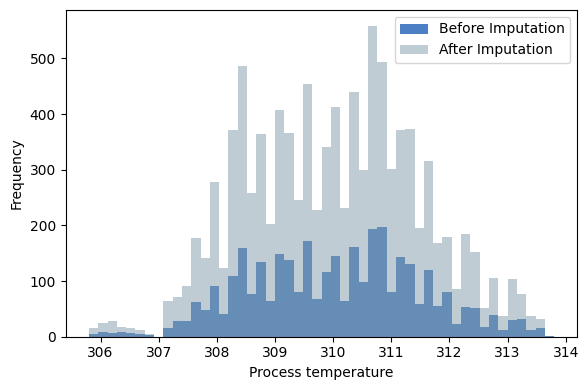

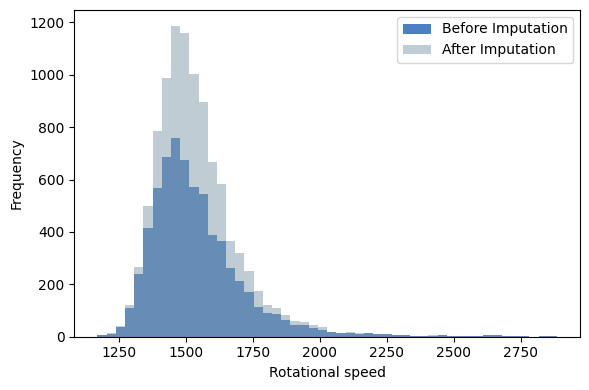

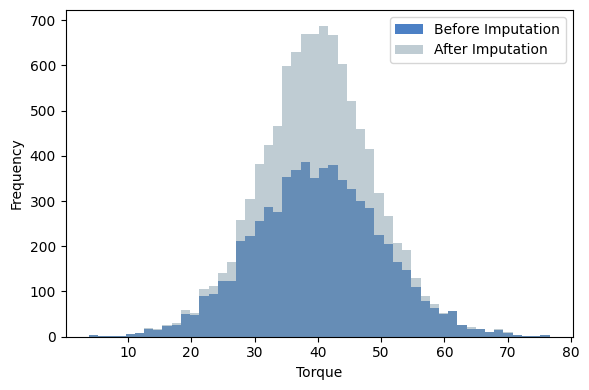

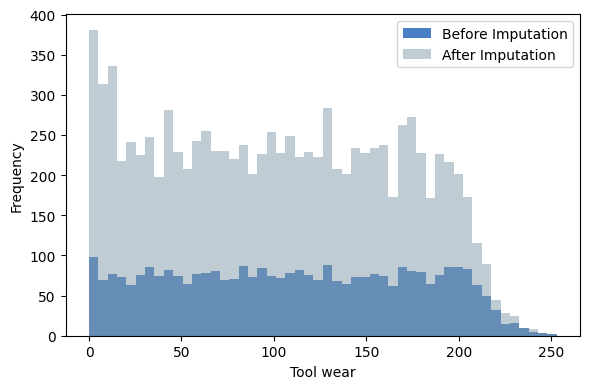


總共產生了 60 張比較圖


In [35]:
plot_count = 0

for name, path in merged_files.items():
    print(f"現在在處理：{name} ({path})")
    df_after = pd.read_csv(path)
    
    # 確認所有 numeric_cols 都存在於 df_after
    missing_cols = [c for c in numeric_cols if c not in df_after.columns]
    if missing_cols:
        print(f"警告：{name} 缺少欄位 {missing_cols}，跳過這個檔案。")
        continue
    
    for col in numeric_cols:
        series_before = new_data[col].dropna()
        series_after  = df_after[col]
        
        plt.figure(figsize=(6, 4))
        plt.hist(series_before, bins=50, alpha=0.7, label='Before Imputation', color='#004aad')
        plt.hist(series_after,  bins=50, alpha=0.5, label='After Imputation', color='#809ba8')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.tight_layout()
        plt.show()
        plt.close()
        
        plot_count += 1

print(f"\n總共產生了 {plot_count} 張比較圖")

In [36]:
root_dir = '../../instance/GAIN'
instance_files = find_all_csv_files(root_dir)
print(instance_files)
print(len(instance_files))

{'PMDI_imputed_ffill_knn_on_system_GAIN': '../../instance/GAIN\\PMDI_imputed_ffill_knn_on_system_GAIN.csv', 'PMDI_imputed_ffill_mean_on_system_GAIN': '../../instance/GAIN\\PMDI_imputed_ffill_mean_on_system_GAIN.csv', 'PMDI_imputed_ffill_median_on_system_GAIN': '../../instance/GAIN\\PMDI_imputed_ffill_median_on_system_GAIN.csv', 'PMDI_imputed_ffill_rolling_on_system_GAIN': '../../instance/GAIN\\PMDI_imputed_ffill_rolling_on_system_GAIN.csv', 'PMDI_imputed_linear_knn_on_system_GAIN': '../../instance/GAIN\\PMDI_imputed_linear_knn_on_system_GAIN.csv', 'PMDI_imputed_linear_mean_on_system_GAIN': '../../instance/GAIN\\PMDI_imputed_linear_mean_on_system_GAIN.csv', 'PMDI_imputed_linear_median_on_system_GAIN': '../../instance/GAIN\\PMDI_imputed_linear_median_on_system_GAIN.csv', 'PMDI_imputed_linear_rolling_on_system_GAIN': '../../instance/GAIN\\PMDI_imputed_linear_rolling_on_system_GAIN.csv', 'PMDI_imputed_rolling_knn_on_system_GAIN': '../../instance/GAIN\\PMDI_imputed_rolling_knn_on_system_GAI

現在在處理：PMDI_imputed_ffill_knn_on_system_GAIN (../../instance/GAIN\PMDI_imputed_ffill_knn_on_system_GAIN.csv)


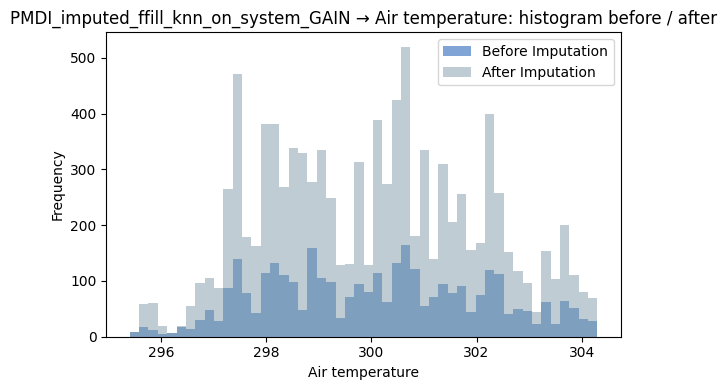

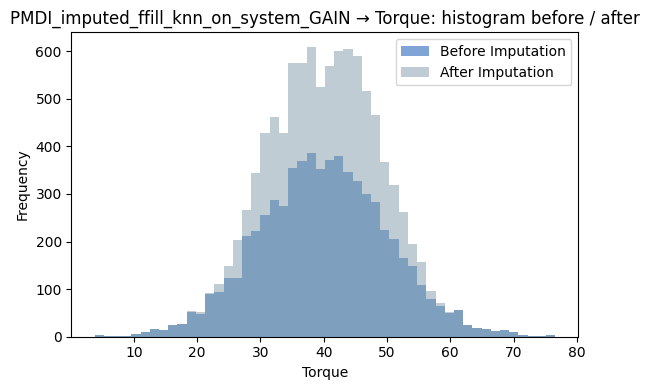

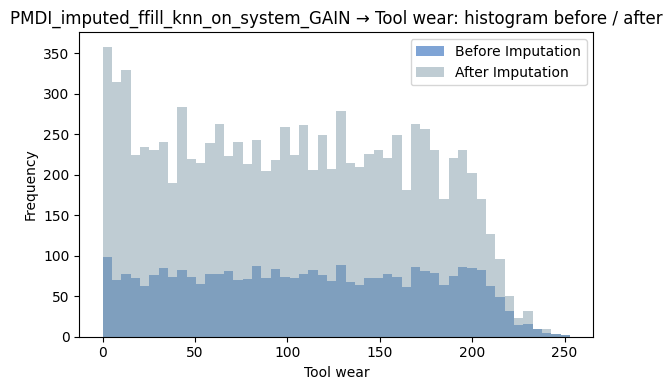

現在在處理：PMDI_imputed_ffill_mean_on_system_GAIN (../../instance/GAIN\PMDI_imputed_ffill_mean_on_system_GAIN.csv)


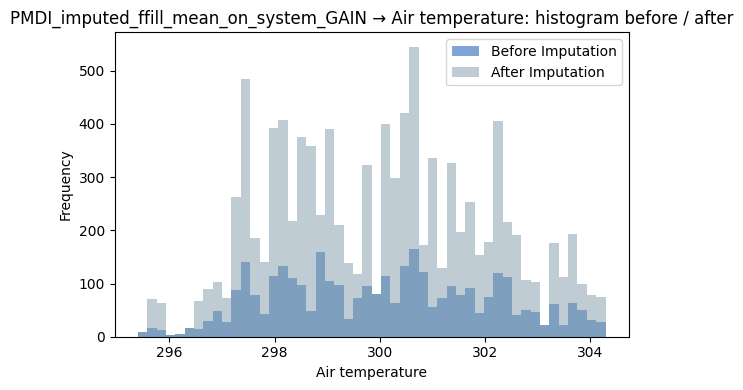

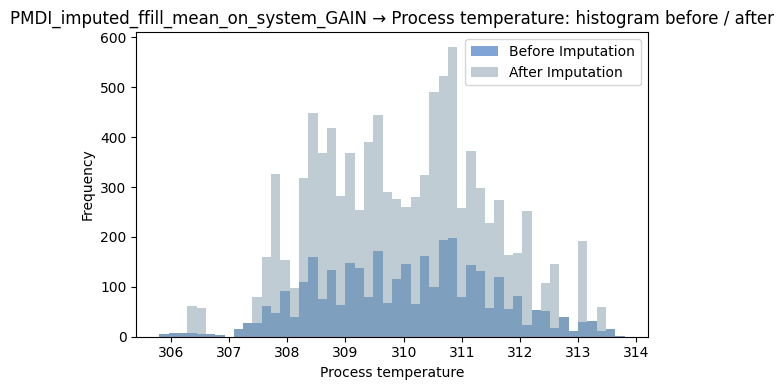

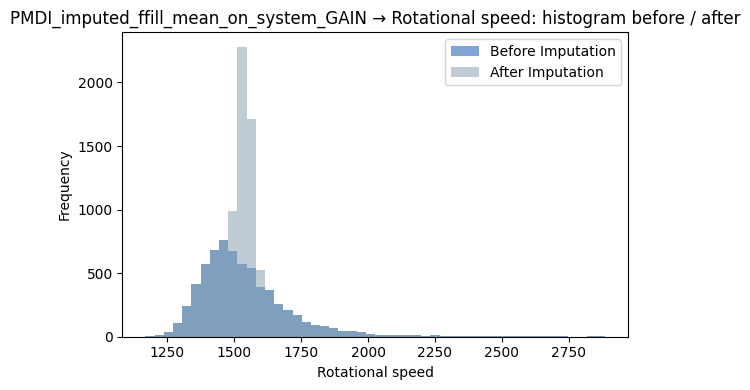

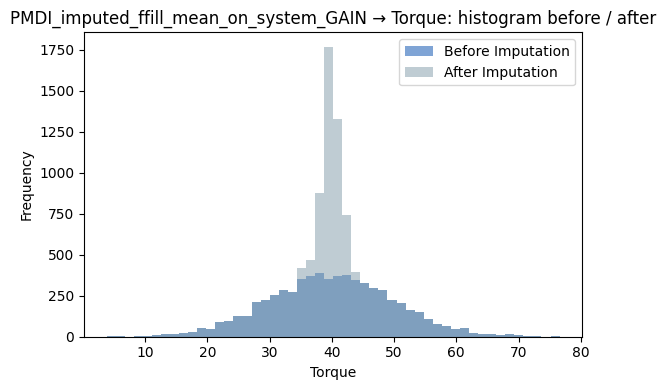

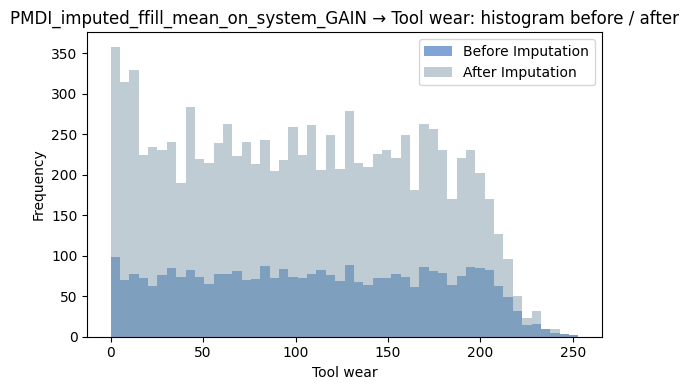

現在在處理：PMDI_imputed_ffill_median_on_system_GAIN (../../instance/GAIN\PMDI_imputed_ffill_median_on_system_GAIN.csv)


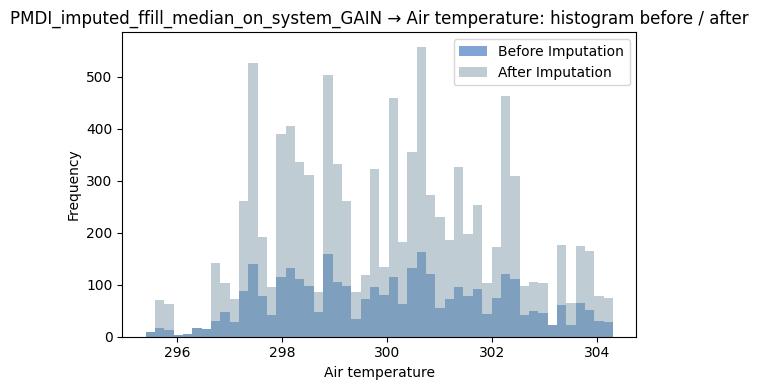

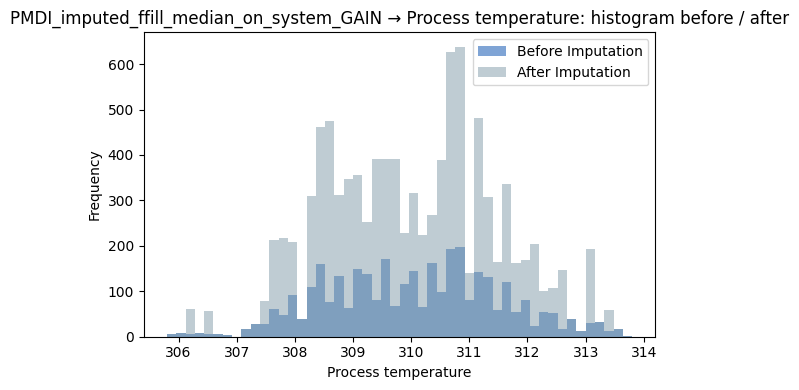

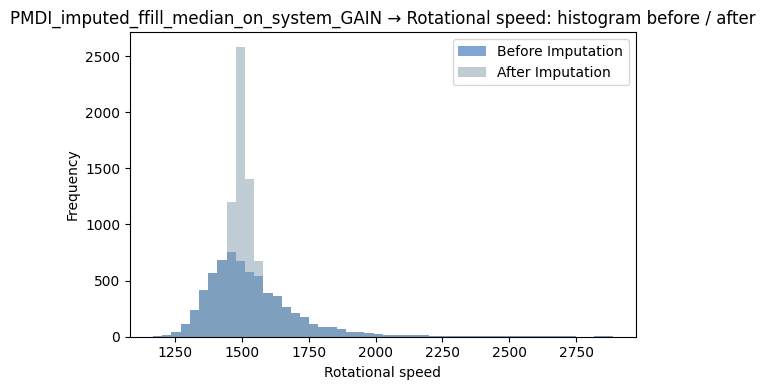

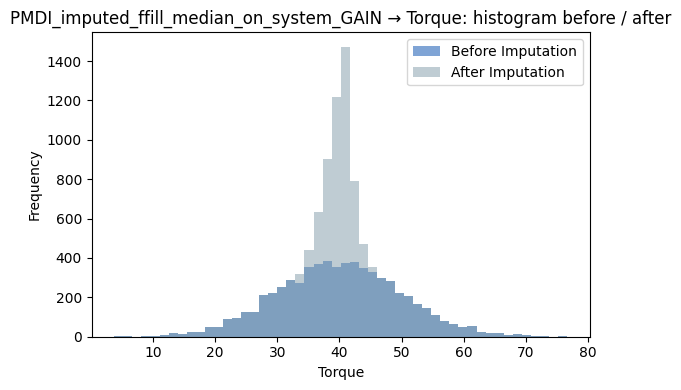

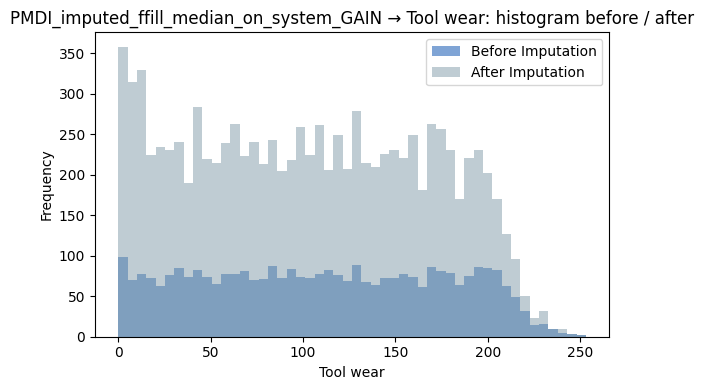

現在在處理：PMDI_imputed_ffill_rolling_on_system_GAIN (../../instance/GAIN\PMDI_imputed_ffill_rolling_on_system_GAIN.csv)


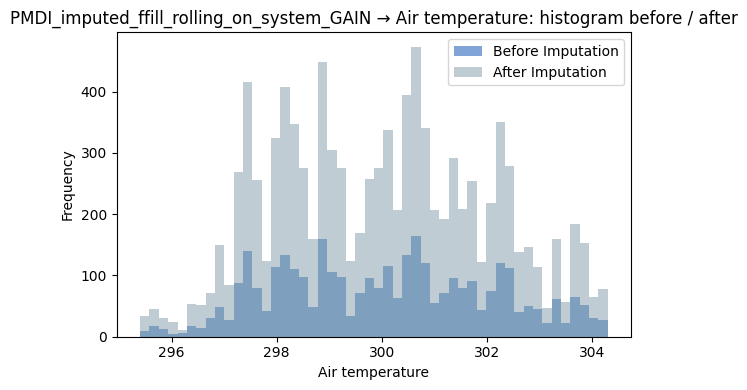

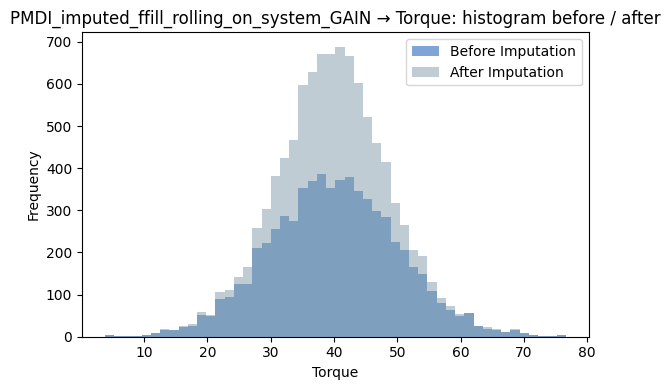

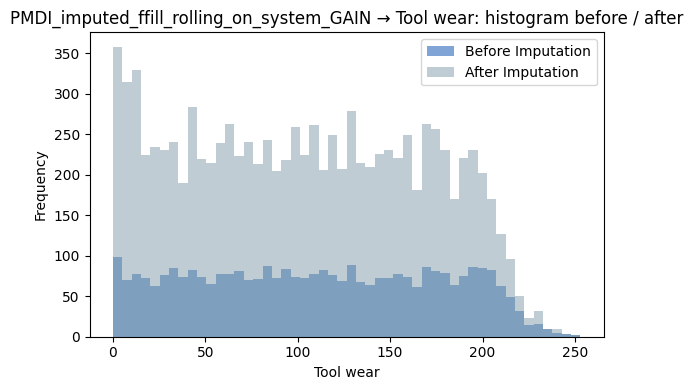

現在在處理：PMDI_imputed_linear_knn_on_system_GAIN (../../instance/GAIN\PMDI_imputed_linear_knn_on_system_GAIN.csv)


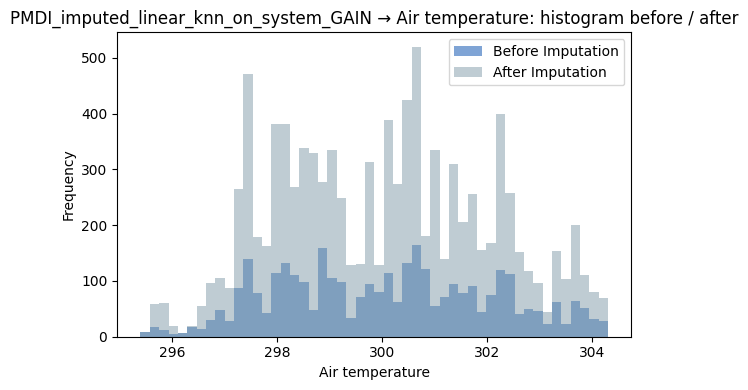

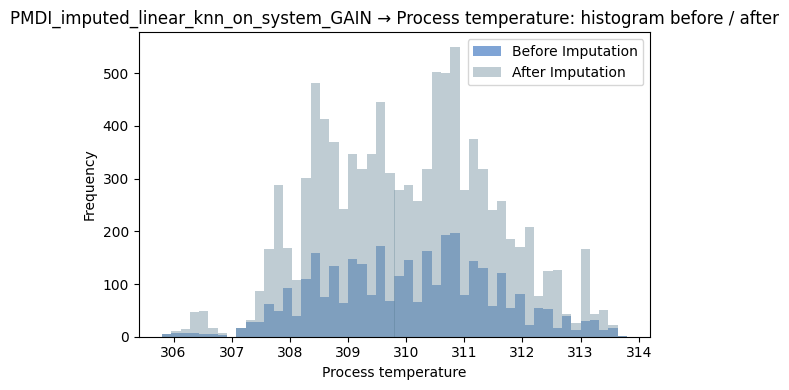

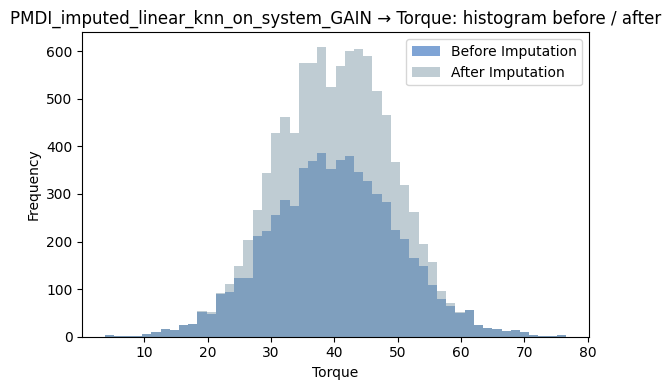

現在在處理：PMDI_imputed_linear_mean_on_system_GAIN (../../instance/GAIN\PMDI_imputed_linear_mean_on_system_GAIN.csv)


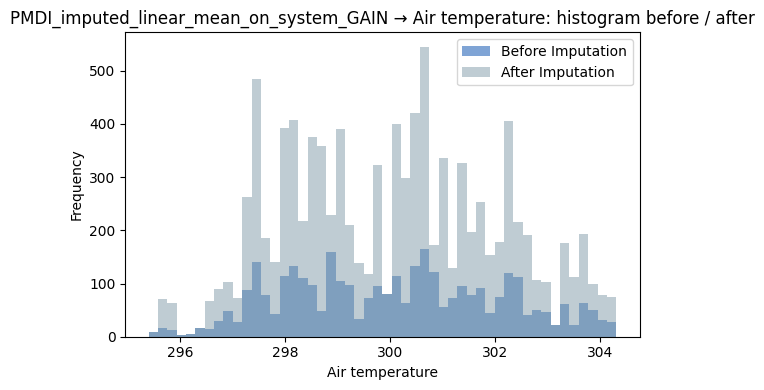

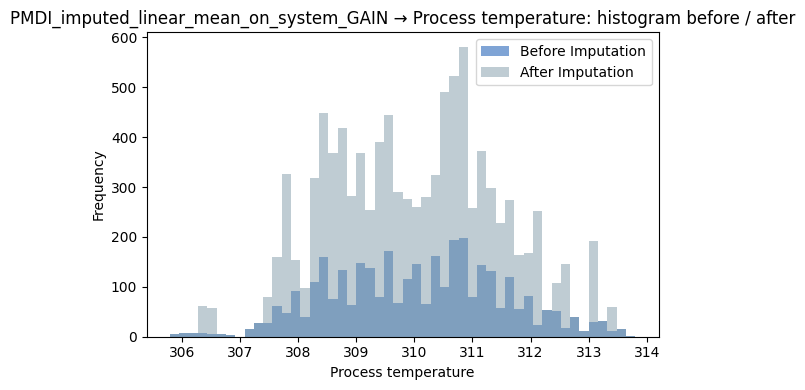

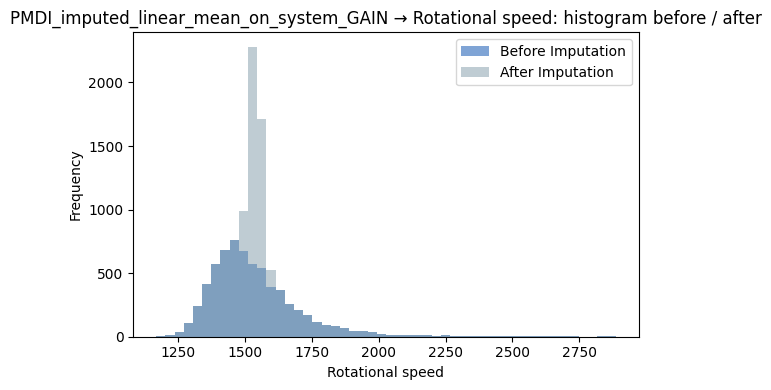

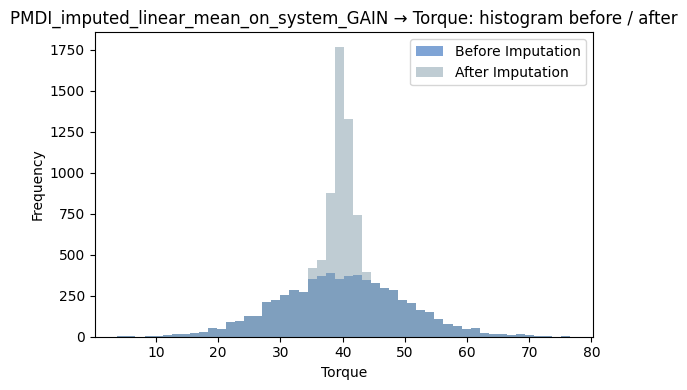

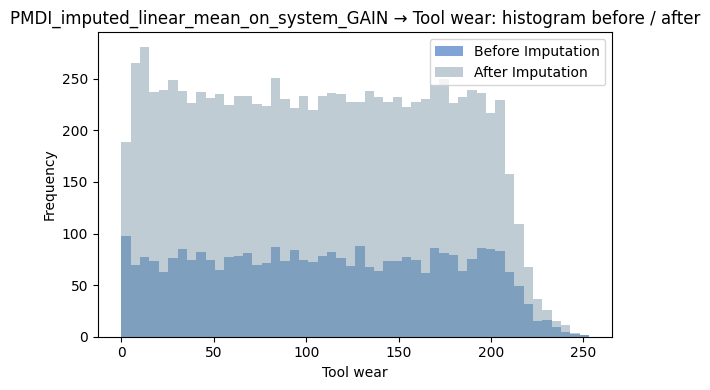

現在在處理：PMDI_imputed_linear_median_on_system_GAIN (../../instance/GAIN\PMDI_imputed_linear_median_on_system_GAIN.csv)


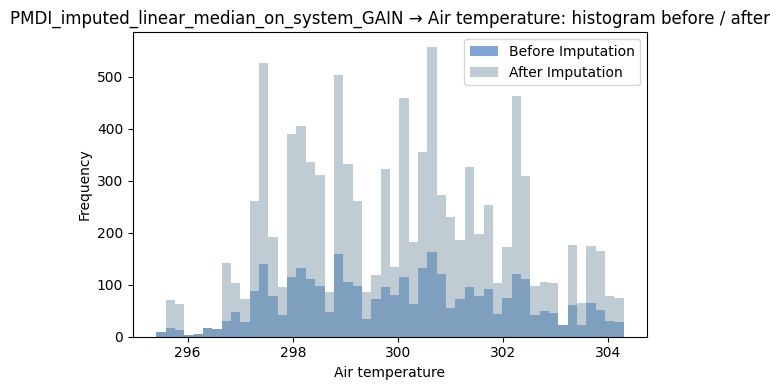

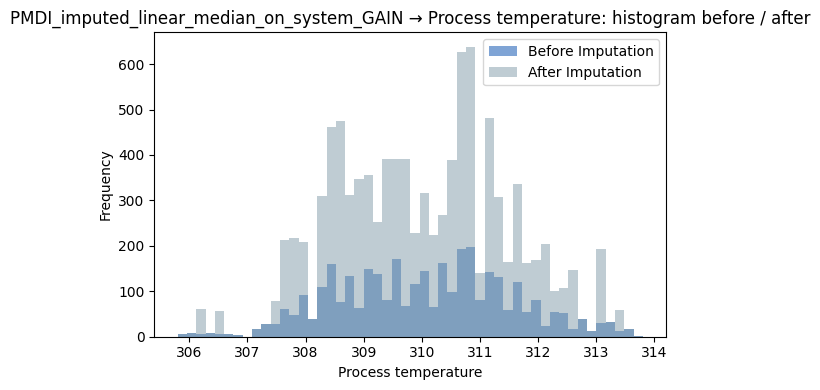

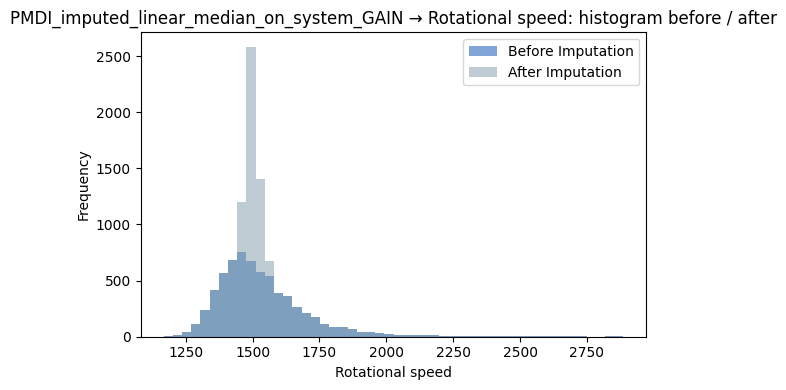

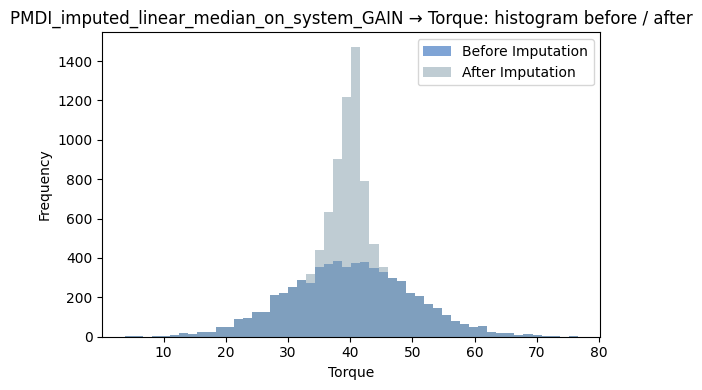

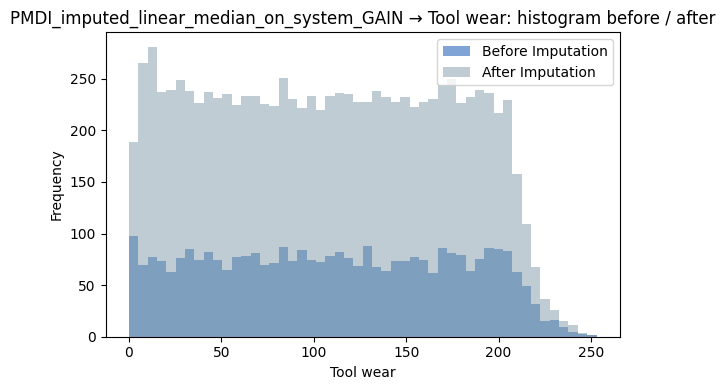

現在在處理：PMDI_imputed_linear_rolling_on_system_GAIN (../../instance/GAIN\PMDI_imputed_linear_rolling_on_system_GAIN.csv)


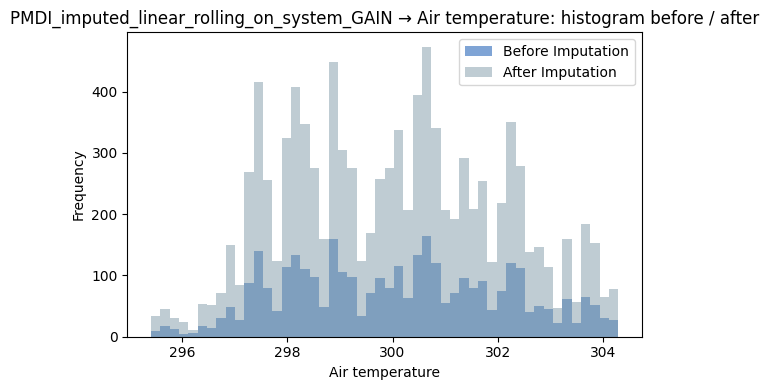

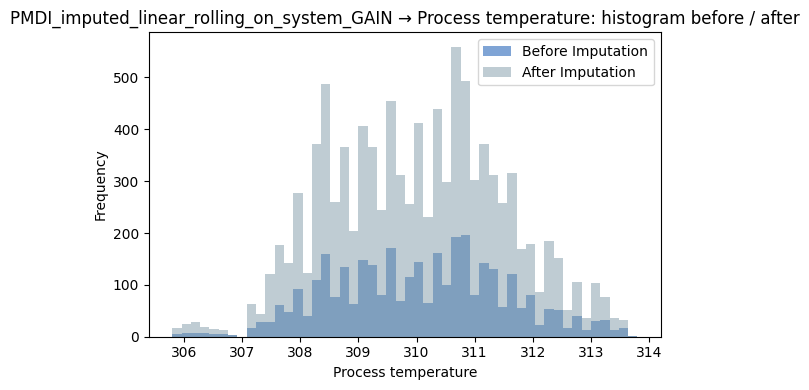

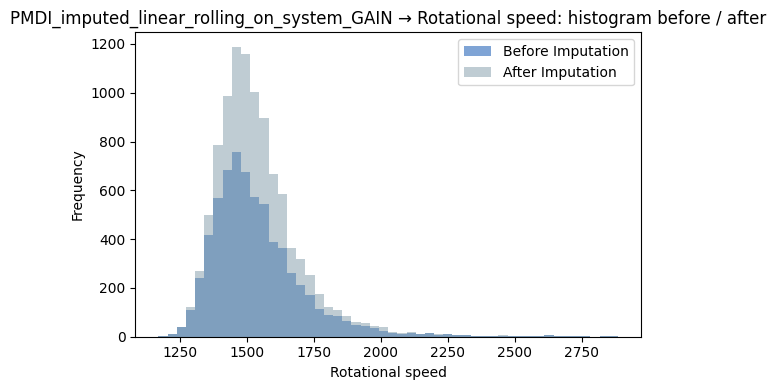

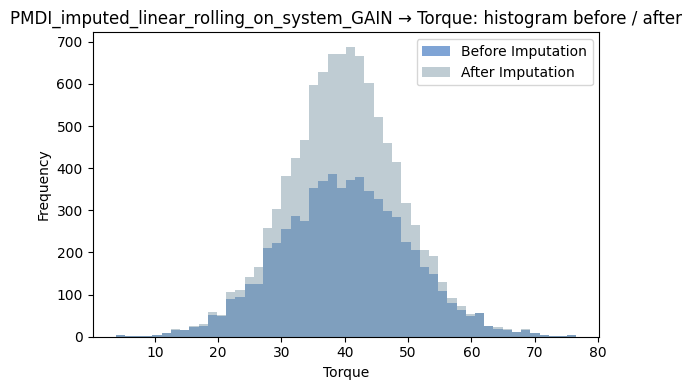

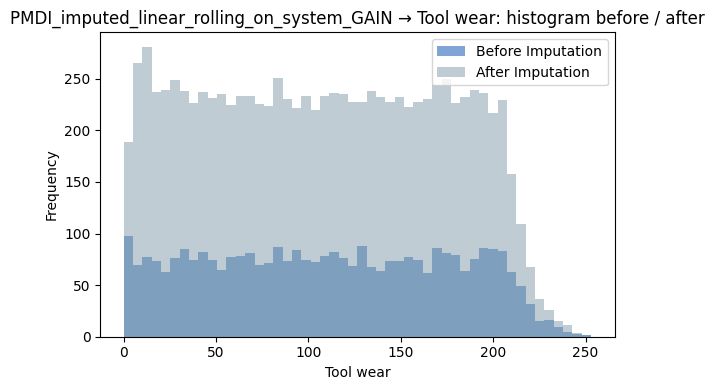

現在在處理：PMDI_imputed_rolling_knn_on_system_GAIN (../../instance/GAIN\PMDI_imputed_rolling_knn_on_system_GAIN.csv)


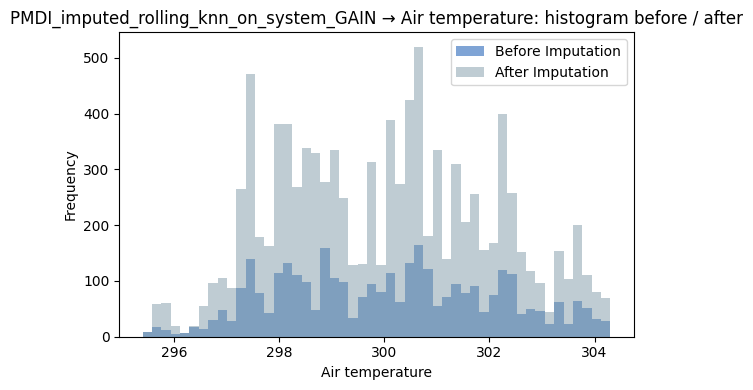

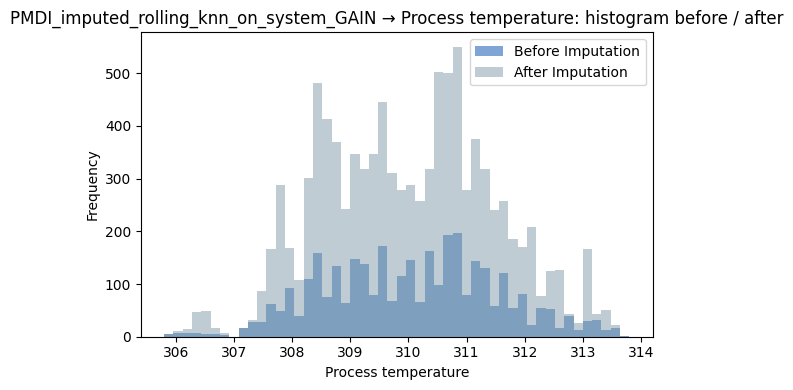

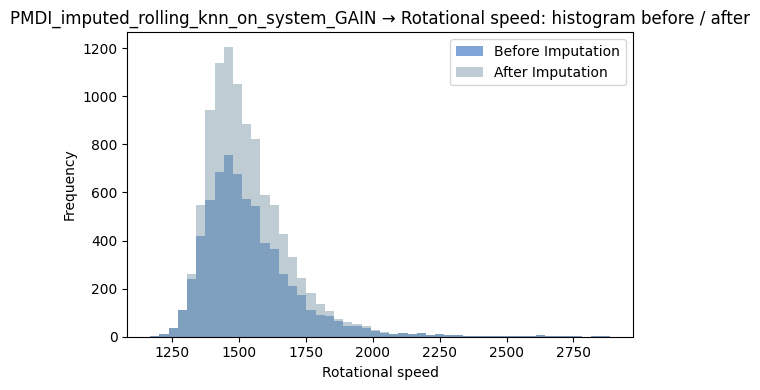

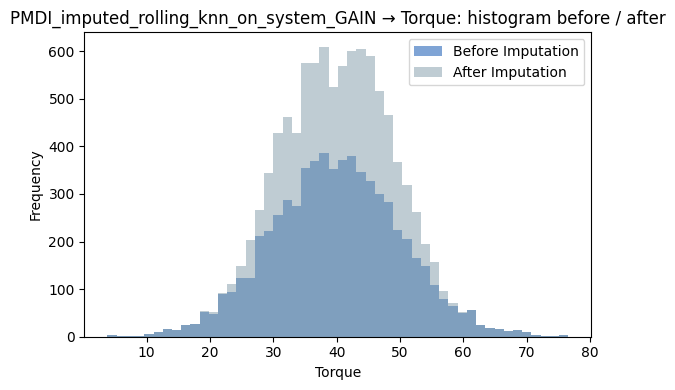

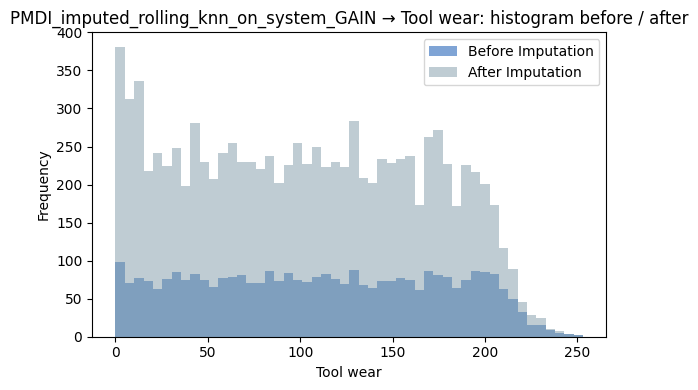

現在在處理：PMDI_imputed_rolling_mean_on_system_GAIN (../../instance/GAIN\PMDI_imputed_rolling_mean_on_system_GAIN.csv)


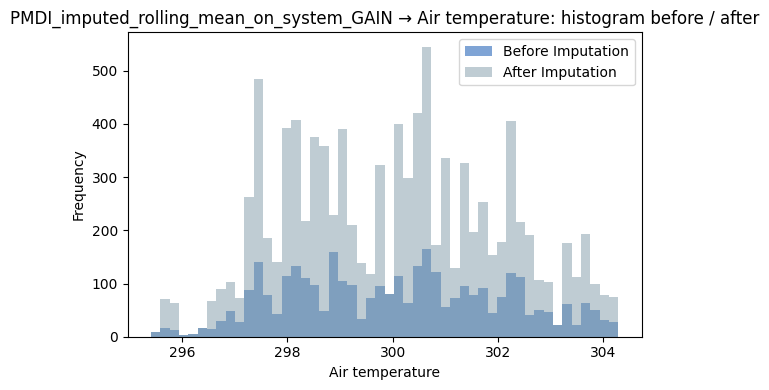

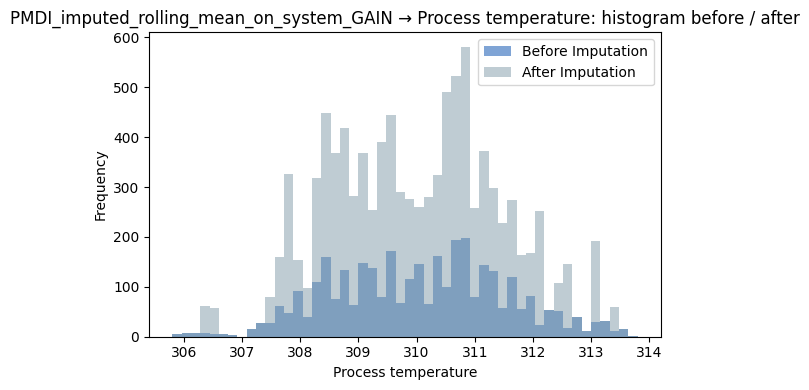

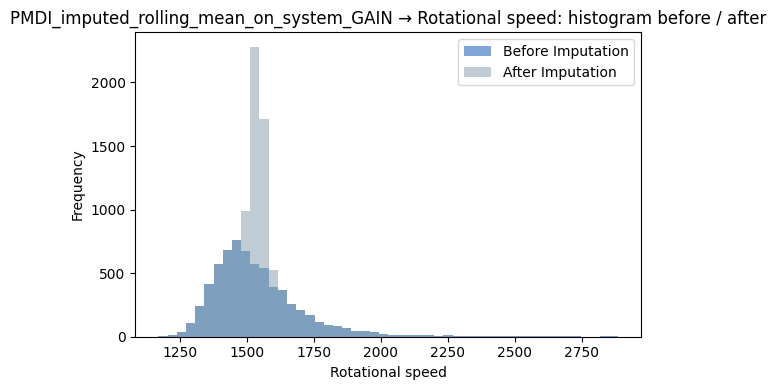

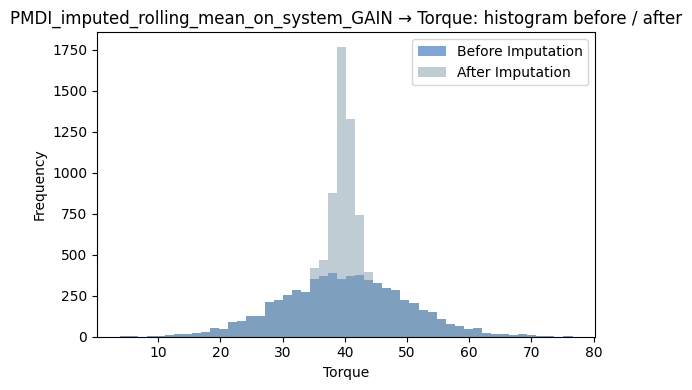

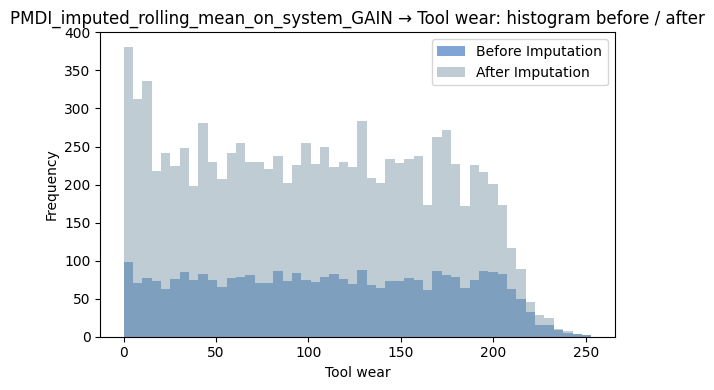

現在在處理：PMDI_imputed_rolling_median_on_system_GAIN (../../instance/GAIN\PMDI_imputed_rolling_median_on_system_GAIN.csv)


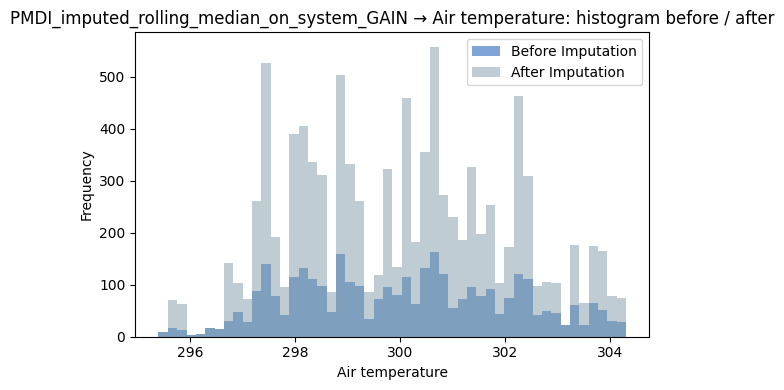

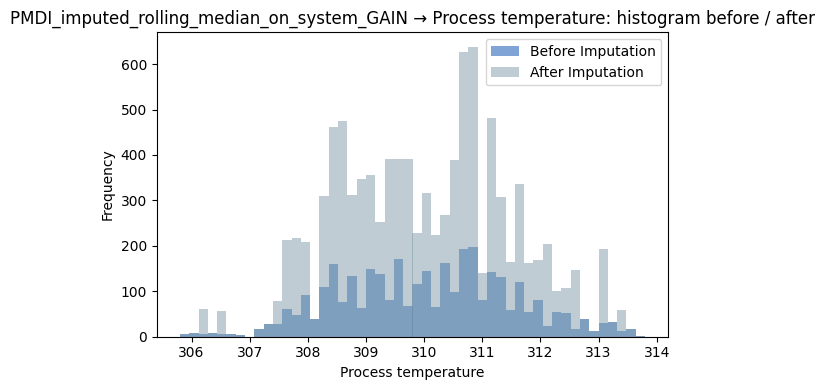

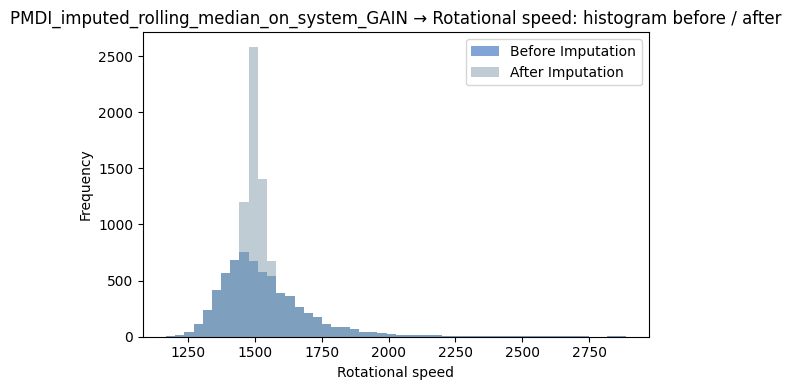

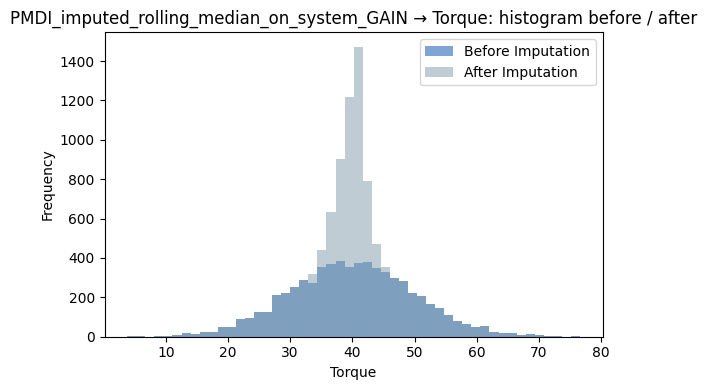

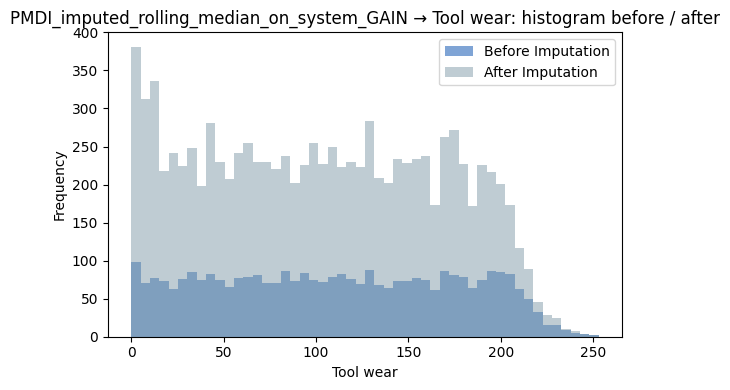

現在在處理：PMDI_imputed_rolling_rolling_on_system_GAIN (../../instance/GAIN\PMDI_imputed_rolling_rolling_on_system_GAIN.csv)


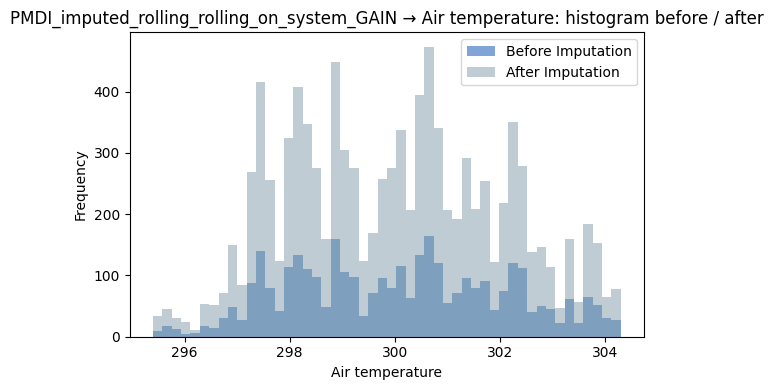

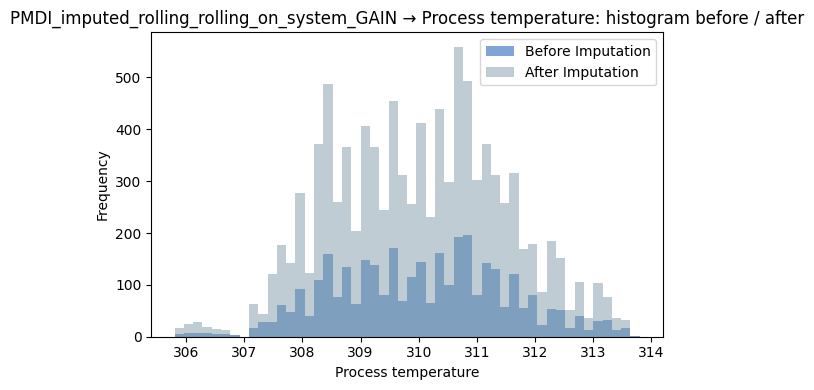

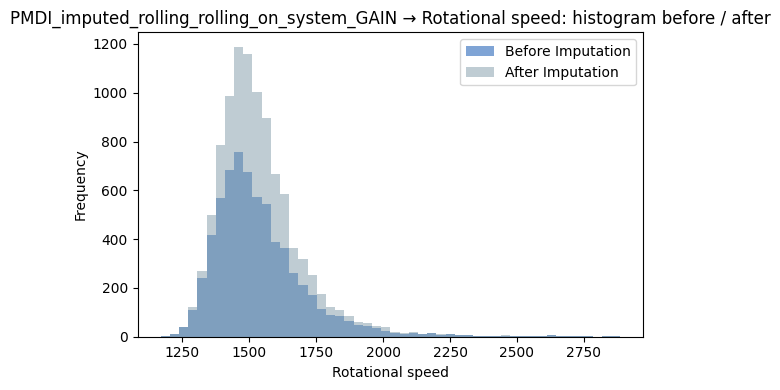

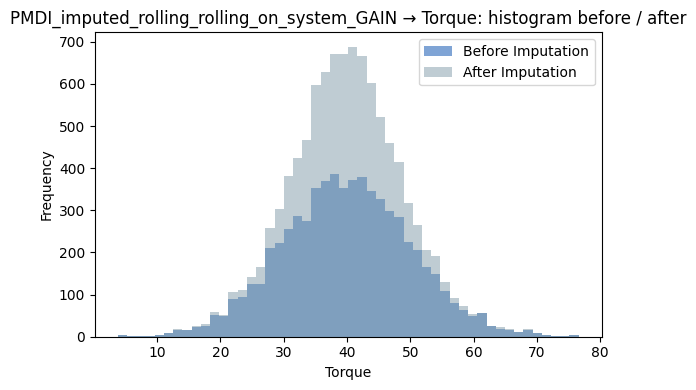

總共產生了 60 張比較圖


In [37]:
plot_count = 0
for name, path in instance_files.items():
    print(f"現在在處理：{name} ({path})")   
    # 讀取「補值後」的 CSV
    df_after = pd.read_csv(path)
    
    # 確認所有 numeric_cols 都存在於 df_after 中
    missing_cols = [c for c in numeric_cols if c not in df_after.columns]
    if missing_cols:
        print(f"警告：{name} 缺少欄位 {missing_cols}，跳過這個檔案。")
        continue
    
    # 針對每一個數值欄位畫出「補值前 vs 補值後」的直方圖
    for col in numeric_cols:
        # 原始有值的資料（去掉 NaN）
        series_before = new_data[col].dropna()
        # 補值後（CSV 讀進來會有完整值）
        series_after = df_after[col]
        
        plt.figure(figsize=(6, 4))
        plt.hist(series_before, bins=50, alpha=0.5, label='Before Imputation', color='#004aad')
        plt.hist(series_after, bins=50, alpha=0.5, label='After Imputation', color='#809ba8')
        plt.title(f'{name} → {col}: histogram before / after')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.tight_layout()
        plt.show()
        # 如果想要將圖片存檔，取消下一行的註解並指定路徑：
        # plt.savefig(f"plots/{name}_{col}_hist.png", dpi=200)
        plt.close()
        plot_count += 1

print(f"總共產生了 {plot_count} 張比較圖")